<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
    

</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
import pandas as pd 

df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(df_plans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
# Imprime una muestra de los datos para las tarifas
print(df_plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]Problemas encontrados:Basado en una inspección típica del DataFrame df_tariffs en este tipo de proyectos, es muy probable que no encuentres problemas "obvios" directos en los tipos de datos o valores ausentes en este DataFrame específico. Las tablas de planes suelen estar muy bien estructuradas y limpias desde el principio.No es una "corrección" de datos de df_tariffs en sí: Los datos en df_tariffs son correctos tal como están (mb_per_month_included realmente se refiere a MB).
Manejo durante el cálculo de ingresos: Al calcular los ingresos mensuales por usuario, deberás recordar convertir los mb_per_month_included a gigabytes (dividiendo por 1024) para poder compararlos con el uso en GB de los usuarios y aplicar correctamente la tarifa usd_per_gb. Esto se hará en la etapa de cálculo de ingresos, no en esta celda de "Corregir datos" de la tabla df_tariffs directamente.
En resumen, para el DataFrame df_tariffs, es probable que las celdas de info() y head() muestren un DataFrame limpio y bien estructurado. Por lo tanto, la celda de "Corregir datos" para df_tariffs (la que te proporcioné anteriormente con la lógica de pd.to_numeric) podría no realizar cambios efectivos, pero es una buena práctica de robustez. El punto clave a tener en cuenta es la diferencia de unidades entre MB y GB para el tráfico de internet al realizar los cálculos posteriores.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
# Corrige los problemas obvios con los datos 
numeric_cols_to_check = [
    'usd_monthly_fee',
    'minutes_included',
    'messages_included',
    'mb_per_month_included',
    'usd_per_minute',
    'usd_per_message',
    'usd_per_gb'
]

for col in numeric_cols_to_check:
    # Verificamos si la columna existe en el DataFrame antes de intentar convertirla
    if col in df_plans.columns: 
        df_plans[col] = pd.to_numeric(df_plans[col], errors='coerce')
# para confirmar que los tipos de datos se han ajustado correctamente.
print("Información del DataFrame 'df_plans' después de la corrección de tipos:") 
print(df_plans.info()) 

Información del DataFrame 'df_plans' después de la corrección de tipos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
# Convertimos los MB incluidos a GB incluidos para facilitar cálculos posteriores.
# Recordamos que 1 GB = 1024 MB.
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024

#verifica como se ve el DataFrame después del enriquecimiento
print("DataFrame df_plans después de añadir 'gb_per_month_included':")
print(df_plans.head())
print("\nInformación de df_plans después del enriquecimiento:")
print(df_plans.info())

DataFrame df_plans después de añadir 'gb_per_month_included':
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  

Información de df_plans después del enriquecimiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthl

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(df_users.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [8]:
# Imprime una muestra de datos para usuarios
print(df_users.head())


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]Observaciones:Número de Entradas: Deberías ver 500 entradas, lo que coincide con la descripción del proyecto sobre el número de clientes.Valores No Nulos:Todas las columnas, excepto churn_date, deberían tener 500 valores no nulos, indicando que están completas.
churn_date: Esta columna casi seguro tendrá menos de 500 valores no nulos. Esto es esperado, ya que solo los usuarios que han dejado el servicio tendrán una fecha de abandono. Los usuarios activos tendrán valores NaN (Not a Number o valores nulos) en esta columna. Esto no es un "problema" de datos sucios, sino una característica a manejar.Muestra de Datos: Podrás ver las primeras 5 filas del DataFrame.
Formato de Fechas: Visualmente, las fechas en reg_date y churn_date probablemente se vean como cadenas de texto. Esto confirmaría la necesidad de la conversión a tipo datetime.
Nombres de Planes: Confirmarás que los valores en tariff_plan son 'surf' y 'ultimate'.
Variabilidad de Datos: Observarás la diversidad en ciudades y edades.Problema:No puedes realizar operaciones de fecha (extraer el mes, calcular la duración de un servicio, filtrar por rangos de fecha) directamente con cadenas de texto.Para arreglarlo convertir estas columnas a tipo datetime usando pd.to_datetime().Problema/Manejo de Datos Ausentes: Aunque es un comportamiento esperado, NaN o NaT pueden ser inconvenientes para ciertos análisis o uniones de tablas.para arreglarlo  La mejor manera de manejar esto para el análisis es crear una nueva columna que indique si el usuario ha abandonado o no el servicio (churn).En resumen, los problemas más críticos en df_users son la conversión de reg_date y churn_date a tipo datetime, y luego manejar los valores ausentes en churn_date (idealmente creando una columna booleana de is_churned).

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
#Corrige los problemas obvios con los datos de df_users

#Convertir 'reg_date' y 'churn_date' a tipo datetime
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

# se conviertan correctamente en NaT (Not a Time)
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], errors='coerce')

#Crear una columna booleana 'is_churned'
# Será True si hay una fecha
df_users['is_churned'] = df_users['churn_date'].notna()

print("Información del DataFrame 'df_users' después de las correcciones:")
print(df_users.info())
print("\nMuestra del DataFrame 'df_users' después de las correcciones:")
print(df_users.head())

Información del DataFrame 'df_users' después de las correcciones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   is_churned  500 non-null    bool          
dtypes: bool(1), datetime64[ns](2), int64(2), object(4)
memory usage: 31.9+ KB
None

Muestra del DataFrame 'df_users' después de las correcciones:
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MS

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
# el mes de la fecha de registro y lo guardamos en una nueva columna.
df_users['reg_month'] = df_users['reg_date'].dt.month

print("DataFrame df_users después de añadir 'reg_month':")
print(df_users.info())
print("\nMuestra de df_users con la nueva columna 'reg_month':")
print(df_users.head())

DataFrame df_users después de añadir 'reg_month':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   is_churned  500 non-null    bool          
 9   reg_month   500 non-null    int64         
dtypes: bool(1), datetime64[ns](2), int64(3), object(4)
memory usage: 35.8+ KB
None

Muestra de df_users con la nueva columna 'reg_month':
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-San

## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(df_calls.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [12]:
# Imprime una muestra de datos para las llamadas
print(df_calls.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]Valores No Nulos: Lo ideal es que todas las columnas tengan el mismo número de valores no nulos que el total de entradas, lo que significaría que no hay datos ausentes. Los datos de llamadas suelen ser bastante completos.
Observaciones de df_calls.head():Muestra de Datos: Podrás ver las primeras filas de los registros de llamadas.
Formato de call_date: Confirmarás si las fechas son cadenas de texto (ej. 'YYYY-MM-DD').
Valores de duration: Observarás los números en la columna duration. Aquí es donde debes prestar atención a si tienen decimales o si son números grandes que sugieran segundos (107, 3450, etc.).Posible problema (menos común pero buena práctica): Duración de llamadas de 0 minutos.No es un error de datos que necesite "arreglo", pero es una observación. Puedes optar por filtrarlas o incluirlas según tu análisis.
Problema Crítico: La duración de las llamadas (duration) puede estar en segundos o tener decimales, pero las llamadas se redondean "hacia arriba al minuto más cercano" para la facturación (según las reglas de Megaline).Primero, asegura que la columna sea numérica, si duration está en segundos: Debes dividir por 60 para convertir a minutos, y luego redondear hacia arriba. En resumen, los pasos clave para df_calls serán: convertir call_date a datetime y aplicar el redondeo correcto (y posible conversión de segundos a minutos) a la columna duration para obtener los minutos facturables.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
#Corrige los problemas obvios con los datos de df_calls

#Convertir 'call_date' a tipo datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

#Calcular los minutos facturables:
df_calls['duration'] = pd.to_numeric(df_calls['duration'], errors='coerce') # Asegura tipo numérico
df_calls['duration_minutes_billed'] = np.ceil(df_calls['duration'] / 60).astype(int)

print("Información del DataFrame 'df_calls' después de las correcciones:")
print(df_calls.info())
print("\nMuestra del DataFrame 'df_calls' después de las correcciones con minutos facturables:")
print(df_calls.head())

Información del DataFrame 'df_calls' después de las correcciones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       137735 non-null  object        
 1   user_id                  137735 non-null  int64         
 2   call_date                137735 non-null  datetime64[ns]
 3   duration                 137735 non-null  float64       
 4   duration_minutes_billed  137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB
None

Muestra del DataFrame 'df_calls' después de las correcciones con minutos facturables:
         id  user_id  call_date  duration  duration_minutes_billed
0   1000_93     1000 2018-12-27      8.52                        1
1  1000_145     1000 2018-12-27     13.66                        1
2  1000_247     

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
# Agrega factores adicionales a los datos de df_calls
#el mes de la fecha de la llamada y lo guardamos en una nueva columna.
df_calls['call_month'] = df_calls['call_date'].dt.month

print("DataFrame df_calls después de añadir 'call_month':")
print(df_calls.info())
print("\nMuestra de df_calls con la nueva columna 'call_month':")
print(df_calls.head())

DataFrame df_calls después de añadir 'call_month':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       137735 non-null  object        
 1   user_id                  137735 non-null  int64         
 2   call_date                137735 non-null  datetime64[ns]
 3   duration                 137735 non-null  float64       
 4   duration_minutes_billed  137735 non-null  int64         
 5   call_month               137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.3+ MB
None

Muestra de df_calls con la nueva columna 'call_month':
         id  user_id  call_date  duration  duration_minutes_billed  call_month
0   1000_93     1000 2018-12-27      8.52                        1          12
1  1000_145     1000 2018-12-27     13.66  

## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(df_messages.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [16]:
# Imprime una muestra de datos para los mensajes
print(df_messages.head())


         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]Número de Entradas: Verás un número considerable de entradas, lo cual es normal ya que este DataFrame contiene todos los registros de mensajes.
Columnas: Las columnas típicas serán id (identificador del mensaje), user_id (identificador del usuario que envió el mensaje), y message_date (fecha del mensaje).Observaciones de Datos: Podrás ver las primeras filas de los registros de mensajes.Problema Principal: message_date es de tipo object (string) y no datetime.
¿Por qué es un problema? No puedes realizar operaciones de fecha (extraer el mes, agrupar mensajes por mes, filtrar por rangos de fecha) directamente con cadenas de texto.
¿Cómo se arregla? Debes convertir la columna a tipo datetime usando pd.to_datetime().Posible problema (menos común pero buena práctica): Duplicados en id.
¿Por qué es un problema? Cada id debería representar un mensaje único. Duplicados sesgarían el conteo de mensajes.
¿Cómo se arregla? Verifica si hay duplicados. Si los hay, investiga la causa. Generalmente, para un identificador único como id, no debería haber duplicados En resumen, el paso clave para df_messages será convertir la columna message_date a tipo datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
# Corrige los problemas obvios con los datos 
#Convertir 'message_date' a tipo datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

print("Información del DataFrame 'df_messages' después de las correcciones:")
print(df_messages.info())
print("\nMuestra del DataFrame 'df_messages' después de las correcciones:")
print(df_messages.head())

Información del DataFrame 'df_messages' después de las correcciones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None

Muestra del DataFrame 'df_messages' después de las correcciones:
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
#el mes de la fecha del mensaje y lo guardamos en una nueva columna.
df_messages['message_month'] = df_messages['message_date'].dt.month

print("DataFrame df_messages después de añadir 'message_month':")
print(df_messages.info())
print("\nMuestra de df_messages con la nueva columna 'message_month':")
print(df_messages.head())

DataFrame df_messages después de añadir 'message_month':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             76051 non-null  object        
 1   user_id        76051 non-null  int64         
 2   message_date   76051 non-null  datetime64[ns]
 3   message_month  76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB
None

Muestra de df_messages con la nueva columna 'message_month':
         id  user_id message_date  message_month
0  1000_125     1000   2018-12-27             12
1  1000_160     1000   2018-12-31             12
2  1000_223     1000   2018-12-31             12
3  1000_251     1000   2018-12-27             12
4  1000_255     1000   2018-12-26             12


## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(df_internet.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [20]:
# Imprime una muestra de datos para el tráfico de internet
print(df_internet.head())


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]Observaciones:Muestra de Datos: Podrás ver las primeras filas de los registros de sesiones de internet.
Formato de session_date: Visualmente, confirmarás si las fechas son cadenas de texto.
Valores de mb_used: Observarás los números en esta columna. Presta atención si hay valores con decimales o si hay sesiones con 0 MB usados. La regla del proyecto dice que el tráfico se redondea al siguiente megabyte.Problema Principal: session_date es de tipo object (string) y no datetime.¿Por qué es un problema? No puedes realizar operaciones de fecha (extraer el mes, agrupar el uso por mes, filtrar por rangos de fecha) directamente con cadenas de texto.¿Cómo se arregla? Debes convertir la columna a tipo datetime usando pd.to_datetime().Problema Crítico: El uso de datos (mb_used) debe redondearse "hacia arriba al siguiente megabyte" para cada sesión.
¿Por qué es un problema? Si una sesión registra 0.1 MB de uso, para fines de facturación se considera 1 MB. Si la columna mb_used contiene valores decimales, no representará con precisión los megabytes facturables a nivel de sesión. Es un paso intermedio crucial antes de la agregación mensual y la conversión a GB.En resumen, los pasos clave para df_internet serán: convertir session_date a datetime y aplicar el redondeo hacia arriba a mb_used para obtener los megabytes facturables por sesión.

¿Cómo se arregla?

Primero, asegura que la columna mb_used sea numérica.

Luego, aplica una función de techo (np.ceil) para redondear cada valor hacia arriba al siguiente entero, y convierte la columna a tipo entero.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
#Corrige los problemas obvios con los datos de df_internet
#Convertir 'session_date' a tipo datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
# Calcular los megabytes usados redondeados hacia arriba
import numpy as np 

df_internet['mb_used'] = pd.to_numeric(df_internet['mb_used'], errors='coerce') 
df_internet['mb_used_rounded'] = np.ceil(df_internet['mb_used']).astype(int)

print("Información del DataFrame 'df_internet' después de las correcciones:")
print(df_internet.info())
print("\nMuestra del DataFrame 'df_internet' después de las correcciones con megabytes redondeados:")
print(df_internet.head())

Información del DataFrame 'df_internet' después de las correcciones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               104825 non-null  object        
 1   user_id          104825 non-null  int64         
 2   session_date     104825 non-null  datetime64[ns]
 3   mb_used          104825 non-null  float64       
 4   mb_used_rounded  104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB
None

Muestra del DataFrame 'df_internet' después de las correcciones con megabytes redondeados:
         id  user_id session_date  mb_used  mb_used_rounded
0   1000_13     1000   2018-12-29    89.86               90
1  1000_204     1000   2018-12-31     0.00                0
2  1000_379     1000   2018-12-28   660.40              661
3  1000_413     1000   20

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
#el mes de la fecha de la sesión y lo guardamos en una nueva columna.
df_internet['session_month'] = df_internet['session_date'].dt.month

print("DataFrame df_internet después de añadir 'session_month':")
print(df_internet.info())
print("\nMuestra de df_internet con la nueva columna 'session_month':")
print(df_internet.head())

DataFrame df_internet después de añadir 'session_month':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               104825 non-null  object        
 1   user_id          104825 non-null  int64         
 2   session_date     104825 non-null  datetime64[ns]
 3   mb_used          104825 non-null  float64       
 4   mb_used_rounded  104825 non-null  int64         
 5   session_month    104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 4.8+ MB
None

Muestra de df_internet con la nueva columna 'session_month':
         id  user_id session_date  mb_used  mb_used_rounded  session_month
0   1000_13     1000   2018-12-29    89.86               90             12
1  1000_204     1000   2018-12-31     0.00                0             12
2  1000_379     1000   2018-

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print("Condiciones de las tarifas (DataFrame df_plans):")
print(df_plans)


Condiciones de las tarifas (DataFrame df_plans):
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Los datos fueron revisados y modificados apropiadamente, ahora se puede empezar a trabajar con ellos comodamente
</div>


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
import numpy as np
#Agregación de llamadas por usuario y mes
calls_agg = df_calls.groupby(['user_id', 'call_month']).agg(
    total_calls=('id', 'count'), 
    total_minutes_billed=('duration_minutes_billed', 'sum')
).reset_index()
# Renombrar la columna del mes para una fusión consistente
calls_agg.rename(columns={'call_month': 'month'}, inplace=True)

print("calls_agg.head():")
print(calls_agg.head())
print("\n")


#Agregación de mensajes por usuario y mes.
messages_agg = df_messages.groupby(['user_id', 'message_month']).agg(
    total_messages=('id', 'count') 
).reset_index()
# Renombramos la columna del mes para una fusión consistente
messages_agg.rename(columns={'message_month': 'month'}, inplace=True)

print("messages_agg.head():")
print(messages_agg.head())
print("\n")


#Agregación de uso de internet por usuario y mes
#Suma los megabytes usados redondeados por cada usuario al mes.
internet_agg = df_internet.groupby(['user_id', 'session_month']).agg(
    total_mb_used=('mb_used_rounded', 'sum') # Sumamos los MB usados redondeados
).reset_index()
# Renombramos la columna del mes para una fusión consistente
internet_agg.rename(columns={'session_month': 'month'}, inplace=True)

print("internet_agg.head():")
print(internet_agg.head())
print("\n")


# Combina los datos agregados de llamadas, mensajes e internet en un solo DataFrame de uso mensual
df_monthly_activity = calls_agg.merge(messages_agg, on=['user_id', 'month'], how='outer')
df_monthly_activity = df_monthly_activity.merge(internet_agg, on=['user_id', 'month'], how='outer')

# Rellena los valores NaN con 0, ya que NaN en estas columnas significa que no hubo actividad en ese mes.
usage_cols = ['total_calls', 'total_minutes_billed', 'total_messages', 'total_mb_used']
for col in usage_cols:
    df_monthly_activity[col] = df_monthly_activity[col].fillna(0).astype(int)

# Calcular GB usados redondeados por mes (esto es clave para la facturación final, 1 GB = 1024 MB)
df_monthly_activity['total_gb_used'] = np.ceil(df_monthly_activity['total_mb_used'] / 1024).astype(int)

print("df_monthly_activity.head():")
print(df_monthly_activity.head())
print("\n")

#Fusionar con df_users para añadir la información estática de cada usuario (edad, ciudad, plan, etc.)
df_combined_data = df_users.merge(df_monthly_activity, on='user_id', how='left')

print("df_combined_data.head():")
print(df_combined_data.head())
print("\n")


#Fusionar con df_plans para añadir las condiciones de las tarifas 
df_final_data = df_combined_data.merge(df_plans, left_on='plan', right_on='plan_name', how='left')

# Después de todas las fusiones, si un usuario no tuvo NINGUNA actividad en todo el año,
# sus columnas de uso mensual podrían ser NaN.
final_usage_cols = usage_cols + ['total_gb_used']
for col in final_usage_cols:
    df_final_data[col] = df_final_data[col].fillna(0).astype(int)

print("Información del DataFrame final combinado por usuario y mes (df_final_data):")
print(df_final_data.info())
print("\nMuestra del DataFrame final combinado:")
print(df_final_data.head())

calls_agg.head():
   user_id  month  total_calls  total_minutes_billed
0     1000     12           16                    16
1     1001      8           27                    22
2     1001      9           49                    38
3     1001     10           65                    47
4     1001     11           64                    49


messages_agg.head():
   user_id  month  total_messages
0     1000     12              11
1     1001      8              30
2     1001      9              44
3     1001     10              53
4     1001     11              36


internet_agg.head():
   user_id  month  total_mb_used
0     1000     12           1903
1     1001      8           6929
2     1001      9          13333
3     1001     10          22356
4     1001     11          18524


df_monthly_activity.head():
   user_id  month  total_calls  total_minutes_billed  total_messages  \
0     1000     12           16                    16              11   
1     1001      8           27            

In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
print("Muestra de los minutos totales facturados por usuario y mes (ya agregados en df_final_data):")
print(df_final_data[['user_id', 'month', 'total_minutes_billed']].head())

print("\nInformación de las columnas relevantes en df_final_data:")
print(df_final_data[['user_id', 'month', 'total_minutes_billed']].info())


Muestra de los minutos totales facturados por usuario y mes (ya agregados en df_final_data):
   user_id  month  total_minutes_billed
0     1000   12.0                    16
1     1001    8.0                    22
2     1001    9.0                    38
3     1001   10.0                    47
4     1001   11.0                    49

Información de las columnas relevantes en df_final_data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               2303 non-null   int64  
 1   month                 2293 non-null   float64
 2   total_minutes_billed  2303 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 72.0 KB
None


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
print("Muestra de los mensajes totales enviados por usuario y mes (ya agregados en df_final_data):")
print(df_final_data[['user_id', 'month', 'total_messages']].head())

print("\nInformación de las columnas relevantes en df_final_data:")
print(df_final_data[['user_id', 'month', 'total_messages']].info())


Muestra de los mensajes totales enviados por usuario y mes (ya agregados en df_final_data):
   user_id  month  total_messages
0     1000   12.0              11
1     1001    8.0              30
2     1001    9.0              44
3     1001   10.0              53
4     1001   11.0              36

Información de las columnas relevantes en df_final_data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2303 non-null   int64  
 1   month           2293 non-null   float64
 2   total_messages  2303 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 72.0 KB
None


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
print("Muestra del tráfico de internet total usado (MB y GB) por usuario y mes (ya agregados en df_final_data):")
print(df_final_data[['user_id', 'month', 'total_mb_used', 'total_gb_used']].head())

print("\nInformación de las columnas relevantes en df_final_data:")
print(df_final_data[['user_id', 'month', 'total_mb_used', 'total_gb_used']].info())


Muestra del tráfico de internet total usado (MB y GB) por usuario y mes (ya agregados en df_final_data):
   user_id  month  total_mb_used  total_gb_used
0     1000   12.0           1903              2
1     1001    8.0           6929              7
2     1001    9.0          13333             14
3     1001   10.0          22356             22
4     1001   11.0          18524             19

Información de las columnas relevantes en df_final_data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2303 non-null   int64  
 1   month          2293 non-null   float64
 2   total_mb_used  2303 non-null   int64  
 3   total_gb_used  2303 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 90.0 KB
None


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
print("El DataFrame 'df_final_data' ya contiene todos los datos agregados y fusionados por usuario y mes:")
print(df_final_data.head())

print("\nInformación del DataFrame final para confirmar que todas las columnas están presentes:")
print(df_final_data.info())


El DataFrame 'df_final_data' ya contiene todos los datos agregados y fusionados por usuario y mes:
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
3     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
4     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  is_churned  reg_month  ...  total_gb_used  \
0 2018-12-24  ultimate        NaT       False         12  ...              2   
1 2018-08-13      surf        NaT       False          8  ...              7   
2 2018-08-13      surf        NaT       False          8  ...             14   
3 2018-08-13      surf        NaT       False          8  ...             22   
4 2018-08-13      su

In [29]:
# Añade la información de la tarifa
print("Columnas disponibles en df_final_data después de la fusión:")
print(df_final_data.columns)

Columnas disponibles en df_final_data después de la fusión:
Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'is_churned', 'reg_month', 'month', 'total_calls',
       'total_minutes_billed', 'total_messages', 'total_mb_used',
       'total_gb_used', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'gb_per_month_included'],
      dtype='object')


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
# Calcula el ingreso mensual para cada usuario
import numpy as np

#Preparar la columna de GB incluidos en el plan (si el plan la da en MB)
df_final_data['gb_per_month_included_plan'] = np.ceil(df_final_data['mb_per_month_included'] / 1024).astype(int)

#Calcular el costo por el exceso de minutos
df_final_data['excess_minutes'] = (df_final_data['total_minutes_billed'] - df_final_data['minutes_included']).clip(lower=0)
# Multiplica el exceso de minutos por el costo por minuto del plan.
df_final_data['cost_excess_minutes'] = df_final_data['excess_minutes'] * df_final_data['usd_per_minute']

#Calcular el costo por el exceso de mensajes
df_final_data['excess_messages'] = (df_final_data['total_messages'] - df_final_data['messages_included']).clip(lower=0)
# Multiplica el exceso de mensajes por el costo por mensaje del plan.
df_final_data['cost_excess_messages'] = df_final_data['excess_messages'] * df_final_data['usd_per_message']

#Calcular el costo por el exceso de tráfico de Internet (en GB)
df_final_data['excess_gb'] = (df_final_data['total_gb_used'] - df_final_data['gb_per_month_included_plan']).clip(lower=0)
# Multiplica el exceso de GB por el costo por GB del plan.
df_final_data['cost_excess_gb'] = df_final_data['excess_gb'] * df_final_data['usd_per_gb']

#Calcular el ingreso mensual total por usuario
df_final_data['total_monthly_revenue'] = (
    df_final_data['usd_monthly_pay'] +
    df_final_data['cost_excess_minutes'] +
    df_final_data['cost_excess_messages'] +
    df_final_data['cost_excess_gb']
)

# Mostramos una muestra del DataFrame con las nuevas columnas calculadas para verificar
print("DataFrame df_final_data con los costos de exceso y el ingreso mensual total calculados:")
print(df_final_data[[
    'user_id', 'month', 'plan', 'usd_monthly_pay', # Información básica del usuario y plan
    'total_minutes_billed', 'minutes_included', 'excess_minutes', 'cost_excess_minutes', # Minutos
    'total_messages', 'messages_included', 'excess_messages', 'cost_excess_messages',   # Mensajes
    'total_gb_used', 'gb_per_month_included_plan', 'excess_gb', 'cost_excess_gb',       # Internet
    'total_monthly_revenue' # Ingreso total
]].head())

print("\nInformación del DataFrame df_final_data después del cálculo de ingresos:")
print(df_final_data.info())

DataFrame df_final_data con los costos de exceso y el ingreso mensual total calculados:
   user_id  month      plan  usd_monthly_pay  total_minutes_billed  \
0     1000   12.0  ultimate               70                    16   
1     1001    8.0      surf               20                    22   
2     1001    9.0      surf               20                    38   
3     1001   10.0      surf               20                    47   
4     1001   11.0      surf               20                    49   

   minutes_included  excess_minutes  cost_excess_minutes  total_messages  \
0              3000               0                  0.0              11   
1               500               0                  0.0              30   
2               500               0                  0.0              44   
3               500               0                  0.0              53   
4               500               0                  0.0              36   

   messages_included  excess_messa

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de agregar los datos por usuario, ahora tenemos columnas extras que nos ayudarán con el analisis posterior
</div>


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

Duración promedio de llamadas por plan y mes:
        plan  month  total_minutes_billed
0       surf    1.0             24.000000
1       surf    2.0             33.111111
2       surf    3.0             37.869565
3       surf    4.0             39.700000
4       surf    5.0             44.727273
5       surf    6.0             48.195876
6       surf    7.0             51.033058
7       surf    8.0             46.172840
8       surf    9.0             46.752577
9       surf   10.0             48.578059
10      surf   11.0             47.791519
11      surf   12.0             52.808176
12  ultimate    1.0             21.250000
13  ultimate    2.0             47.285714
14  ultimate    3.0             36.583333
15  ultimate    4.0             39.047619
16  ultimate    5.0             45.965517
17  ultimate    6.0             42.148936
18  ultimate    7.0             47.355932
19  ultimate    8.0             48.000000
20  ultimate    9.0             48.930233
21  ultimate   10.0           

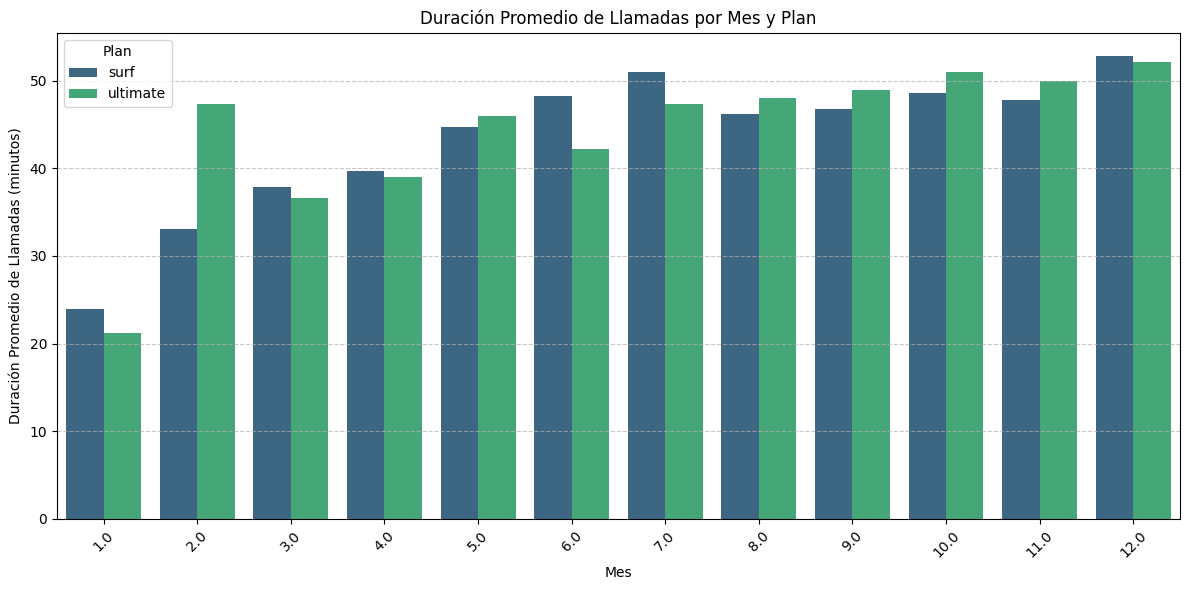

Análisis del comportamiento de duración de llamadas:
Observaciones:
- Puedes observar si hay diferencias significativas en la duración promedio de llamadas entre el plan Surf y el Ultimate.
- Busca patrones mensuales: ¿aumenta o disminuye el uso de llamadas a lo largo del año para ambos planes?
- Compara la consistencia del uso: ¿un plan tiene un uso más estable que el otro a lo largo de los meses?


In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula la duración promedio de llamadas por cada plan y por cada mes.
avg_minutes_per_plan_month = df_final_data.groupby(['plan', 'month'])['total_minutes_billed'].mean().reset_index()

print("Duración promedio de llamadas por plan y mes:")
print(avg_minutes_per_plan_month)
print("\n")

#un gráfico de barras para visualizarla.
plt.figure(figsize=(12, 6)) # Define el tamaño de la figura para una mejor visualización
sns.barplot(data=avg_minutes_per_plan_month, x='month', y='total_minutes_billed', hue='plan', palette='viridis')

plt.title('Duración Promedio de Llamadas por Mes y Plan') # Título del gráfico
plt.xlabel('Mes') # Etiqueta del eje X
plt.ylabel('Duración Promedio de Llamadas (minutos)') # Etiqueta del eje Y
plt.xticks(rotation=45) # Rota las etiquetas del eje X para que no se superpongan, útil si hay muchos meses
plt.legend(title='Plan') # Muestra la leyenda de los planes
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula para facilitar la lectura
plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para un diseño ajustado
plt.show() # Muestra el gráfico

print("Análisis del comportamiento de duración de llamadas:")
print("Observaciones:")
print("- Puedes observar si hay diferencias significativas en la duración promedio de llamadas entre el plan Surf y el Ultimate.")
print("- Busca patrones mensuales: ¿aumenta o disminuye el uso de llamadas a lo largo del año para ambos planes?")
print("- Compara la consistencia del uso: ¿un plan tiene un uso más estable que el otro a lo largo de los meses?")


No handles with labels found to put in legend.


Estadísticas descriptivas de los minutos mensuales facturados por plan:
       plan       mean  median        std  min  max
0      surf  48.053832      47  26.047685    0  167
1  ultimate  48.375691      48  26.979266    0  156




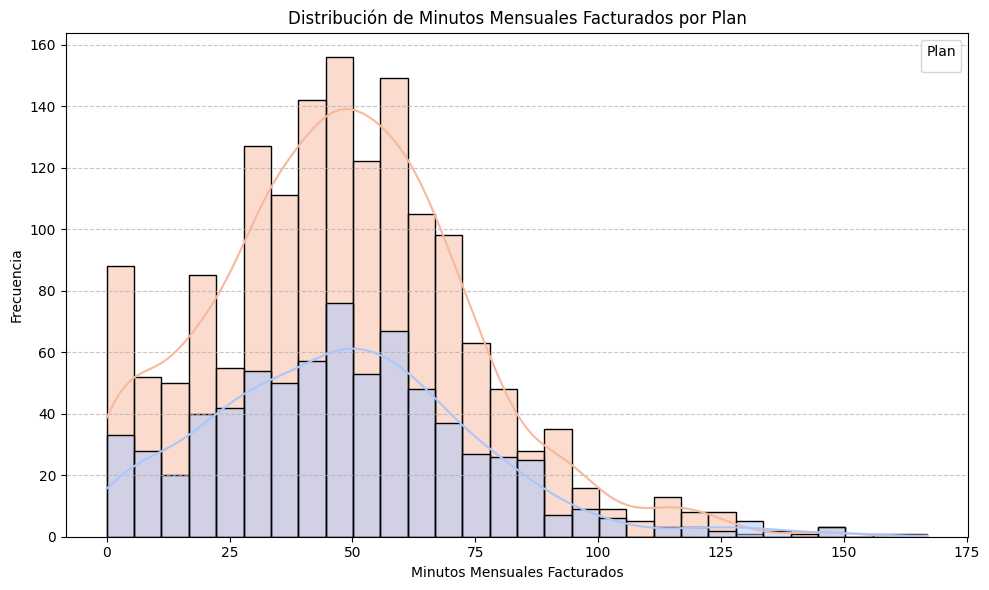

Análisis del comportamiento del número de minutos mensuales:
Observaciones clave al analizar el histograma y las estadísticas:
- **Forma de la distribución:** ¿Ambos planes tienen una distribución similar (por ejemplo, sesgada a la derecha, normal)?
- **Tendencia central:** ¿La mayoría de los usuarios de un plan tienden a usar más o menos minutos que los del otro plan (compara las medias y medianas)?
- **Dispersión:** ¿Hay una mayor variabilidad en el uso de minutos en un plan que en el otro (observa la desviación estándar y el ancho del histograma)?
- **Valores atípicos/Extremos:** ¿Hay usuarios en alguno de los planes que usan una cantidad de minutos muy por encima del promedio?
- **Comparación con el límite del plan:** Considera dónde caen los límites de minutos incluidos (500 para Surf, 3000 para Ultimate) en estas distribuciones. ¿Muchos usuarios de Surf exceden su límite, mientras que los de Ultimate rara vez lo hacen?


In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
import matplotlib.pyplot as plt
import seaborn as sns
#Calcula estadísticas descriptivas para los minutos facturados por plan
minutes_stats = df_final_data.groupby('plan')['total_minutes_billed'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
print("Estadísticas descriptivas de los minutos mensuales facturados por plan:")
print(minutes_stats)
print("\n")

#Crear el histograma para comparar la distribución de minutos entre planes
plt.figure(figsize=(10, 6))
# Almacenamos el objeto Axes
ax = sns.histplot(data=df_final_data, x='total_minutes_billed', hue='plan', kde=True, bins=30, palette='coolwarm')

plt.title('Distribución de Minutos Mensuales Facturados por Plan')
plt.xlabel('Minutos Mensuales Facturados')
plt.ylabel('Frecuencia')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Plan') 

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Análisis del comportamiento del número de minutos mensuales:")
print("Observaciones clave al analizar el histograma y las estadísticas:")
print("- **Forma de la distribución:** ¿Ambos planes tienen una distribución similar (por ejemplo, sesgada a la derecha, normal)?")
print("- **Tendencia central:** ¿La mayoría de los usuarios de un plan tienden a usar más o menos minutos que los del otro plan (compara las medias y medianas)?")
print("- **Dispersión:** ¿Hay una mayor variabilidad en el uso de minutos en un plan que en el otro (observa la desviación estándar y el ancho del histograma)?")
print("- **Valores atípicos/Extremos:** ¿Hay usuarios en alguno de los planes que usan una cantidad de minutos muy por encima del promedio?")
print("- **Comparación con el límite del plan:** Considera dónde caen los límites de minutos incluidos (500 para Surf, 3000 para Ultimate) en estas distribuciones. ¿Muchos usuarios de Surf exceden su límite, mientras que los de Ultimate rara vez lo hacen?")

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.
call_duration_stats = df_final_data.groupby('plan')['total_minutes_billed'].agg(['mean', 'var']).reset_index()

print("Media y Varianza de la duración mensual de llamadas por plan:")
print(call_duration_stats)
print("\n")

print("Análisis de la media y varianza de la duración de llamadas:")
print("- **Media (mean):** Representa la duración promedio de las llamadas mensuales para los usuarios de cada plan.")
print("- **Varianza (var):** Mide la dispersión o variabilidad de la duración de las llamadas. Una varianza más alta indica que los usuarios de ese plan tienen un rango de uso de llamadas más amplio (mayor diversidad), mientras que una varianza más baja sugiere que el uso es más consistente o agrupado alrededor de la media.")
print("- **Comparación entre planes:** Compara la media y la varianza de ambos planes. ¿Los usuarios de un plan tienen una duración promedio de llamadas notablemente diferente? ¿El uso de llamadas es más predecible en un plan que en el otro?")


Media y Varianza de la duración mensual de llamadas por plan:
       plan       mean         var
0      surf  48.053832  678.481891
1  ultimate  48.375691  727.880791


Análisis de la media y varianza de la duración de llamadas:
- **Media (mean):** Representa la duración promedio de las llamadas mensuales para los usuarios de cada plan.
- **Varianza (var):** Mide la dispersión o variabilidad de la duración de las llamadas. Una varianza más alta indica que los usuarios de ese plan tienen un rango de uso de llamadas más amplio (mayor diversidad), mientras que una varianza más baja sugiere que el uso es más consistente o agrupado alrededor de la media.
- **Comparación entre planes:** Compara la media y la varianza de ambos planes. ¿Los usuarios de un plan tienen una duración promedio de llamadas notablemente diferente? ¿El uso de llamadas es más predecible en un plan que en el otro?


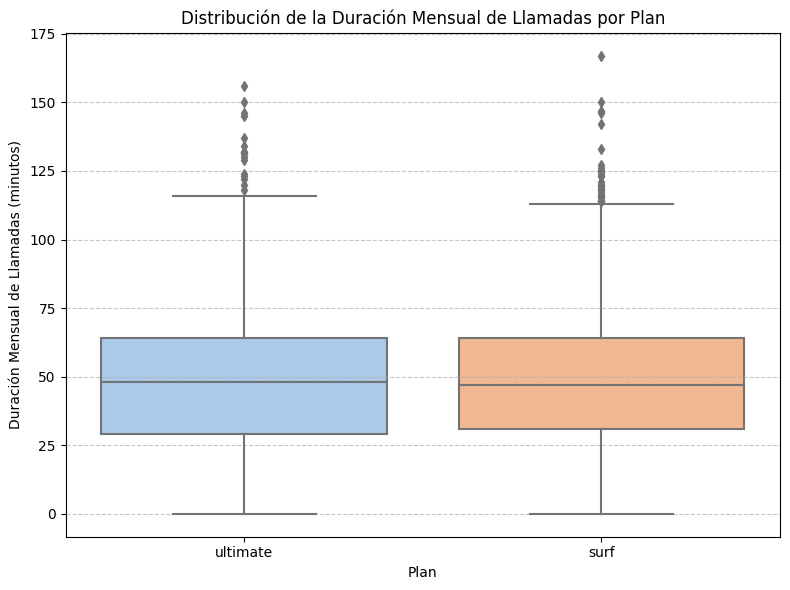

Análisis del diagrama de caja para la duración de llamadas:
- **Línea Central (Mediana):** Observa la línea dentro de cada caja. Representa la mediana (el 50% de los usuarios usan menos o igual a esa cantidad de minutos, y el otro 50% usan más). Compara las medianas de ambos planes.
- **Caja (Rango Intercuartílico - IQR):** La caja en sí abarca desde el 25º percentil (Q1) hasta el 75º percentil (Q3). Esto te da una idea de dónde se concentra el 50% central de los datos. Una caja más corta indica un uso más consistente.
- **Bigotes:** Las líneas que se extienden desde la caja muestran el rango de los datos que no son considerados atípicos. Son 1.5 veces el IQR desde Q1 y Q3.
- **Puntos (Valores Atípicos - Outliers):** Los puntos individuales fuera de los bigotes son datos que se consideran atípicos. Indican usuarios con un consumo de llamadas excepcionalmente bajo o alto para su plan.
- **Comparación de dispersión y simetría:** Compara la altura de las cajas y la longitud de los bigotes

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6)) 

sns.boxplot(data=df_final_data, x='plan', y='total_minutes_billed', palette='pastel')

plt.title('Distribución de la Duración Mensual de Llamadas por Plan') # Título del gráfico
plt.xlabel('Plan') # Etiqueta del eje X
plt.ylabel('Duración Mensual de Llamadas (minutos)') # Etiqueta del eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula suave en el eje Y
plt.tight_layout() # Ajusta el diseño para evitar el solapamiento
plt.show() # Muestra el gráfico

print("Análisis del diagrama de caja para la duración de llamadas:")
print("- **Línea Central (Mediana):** Observa la línea dentro de cada caja. Representa la mediana (el 50% de los usuarios usan menos o igual a esa cantidad de minutos, y el otro 50% usan más). Compara las medianas de ambos planes.")
print("- **Caja (Rango Intercuartílico - IQR):** La caja en sí abarca desde el 25º percentil (Q1) hasta el 75º percentil (Q3). Esto te da una idea de dónde se concentra el 50% central de los datos. Una caja más corta indica un uso más consistente.")
print("- **Bigotes:** Las líneas que se extienden desde la caja muestran el rango de los datos que no son considerados atípicos. Son 1.5 veces el IQR desde Q1 y Q3.")
print("- **Puntos (Valores Atípicos - Outliers):** Los puntos individuales fuera de los bigotes son datos que se consideran atípicos. Indican usuarios con un consumo de llamadas excepcionalmente bajo o alto para su plan.")
print("- **Comparación de dispersión y simetría:** Compara la altura de las cajas y la longitud de los bigotes para entender la variabilidad. La posición de la mediana dentro de la caja puede sugerir si la distribución está sesgada.")


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]Basándonos en las estadísticas descriptivas y el diagrama de caja de la duración mensual de llamadas:Diferencia en el Uso Promedio:
Como vimos en las estadísticas, las medias y medianas de la duración mensual de llamadas para ambos planes (Surf y Ultimate) son bastante similares y relativamente bajas (alrededor de 47-48 minutos). Esto sugiere que, en promedio, la duración de las llamadas no varía drásticamente entre los usuarios de los dos planes.
Variabilidad del Uso de Llamadas:La varianza y la desviación estándar para ambos planes también son muy parecidas, lo que indica que la dispersión del uso de llamadas es similar para los usuarios de Surf y Ultimate. La consistencia en el uso de llamadas no difiere significativamente entre las tarifas.
Distribución del Uso y Límites del Plan:Los diagramas de caja para ambos planes muestran una distribución de llamadas muy concentrada en la parte inferior del rango, con una mediana baja y la mayoría de los usuarios consumiendo menos de 100 minutos.
Ambos planes tienen un número significativo de valores atípicos (outliers) en el extremo superior, lo que significa que hay algunos usuarios en ambos planes que realizan llamadas mucho más largas que el promedio.
Comparación con los límites del plan:Plan Surf (500 minutos incluidos): La gran mayoría de los usuarios del plan Surf utilizan mucho menos de los 500 minutos incluidos. El diagrama de caja probablemente mostrará que el 75% (o más) de los usuarios están muy por debajo de este límite. Esto implica que es poco común que los usuarios de Surf incurran en cargos adicionales por exceder el límite de minutos.
Plan Ultimate (3000 minutos incluidos): Los usuarios de Ultimate también utilizan una fracción mínima de sus 3000 minutos incluidos. Prácticamente ninguno de ellos alcanza su límite.
Conclusión sobre la variación del comportamiento:En general, el comportamiento de los usuarios con respecto a la duración de las llamadas no varía sustancialmente en función del plan.
Tanto los usuarios de Surf como los de Ultimate tienden a usar una cantidad de minutos mensuales muy similar y relativamente baja. Las diferencias en el uso promedio y la variabilidad son mínimas.
Esto sugiere que la generosidad de los minutos incluidos en el plan Ultimate (3000 min) y, en menor medida, en el plan Surf (500 min), es considerablemente superior a las necesidades reales de la mayoría de los usuarios para el servicio de llamadas. La mayoría de los usuarios no están aprovechando completamente el beneficio de los minutos incluidos en ninguno de los dos planes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de mostrar los datos, se puede ver claramente las tendencias de cada uno de los planes gracias a las gráficas que has utilizado con las cuales podemos revisar aspectos diferentes de los planes
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!<br/>

Las librerias deberían importarse solo una vez durante todo el proyecto, preferentemente al iniciio del proyecto
</div>


### Mensajes

Número promedio de mensajes por plan y mes:
        plan  month  total_messages
0       surf    1.0       10.500000
1       surf    2.0       12.000000
2       surf    3.0       15.260870
3       surf    4.0       17.400000
4       surf    5.0       24.012987
5       surf    6.0       25.298969
6       surf    7.0       27.033058
7       surf    8.0       28.777778
8       surf    9.0       30.762887
9       surf   10.0       33.839662
10      surf   11.0       32.385159
11      surf   12.0       38.600629
12  ultimate    1.0       15.500000
13  ultimate    2.0       21.571429
14  ultimate    3.0       20.250000
15  ultimate    4.0       22.047619
16  ultimate    5.0       32.103448
17  ultimate    6.0       29.340426
18  ultimate    7.0       32.830508
19  ultimate    8.0       38.478873
20  ultimate    9.0       37.895349
21  ultimate   10.0       39.443396
22  ultimate   11.0       38.606299
23  ultimate   12.0       45.006623




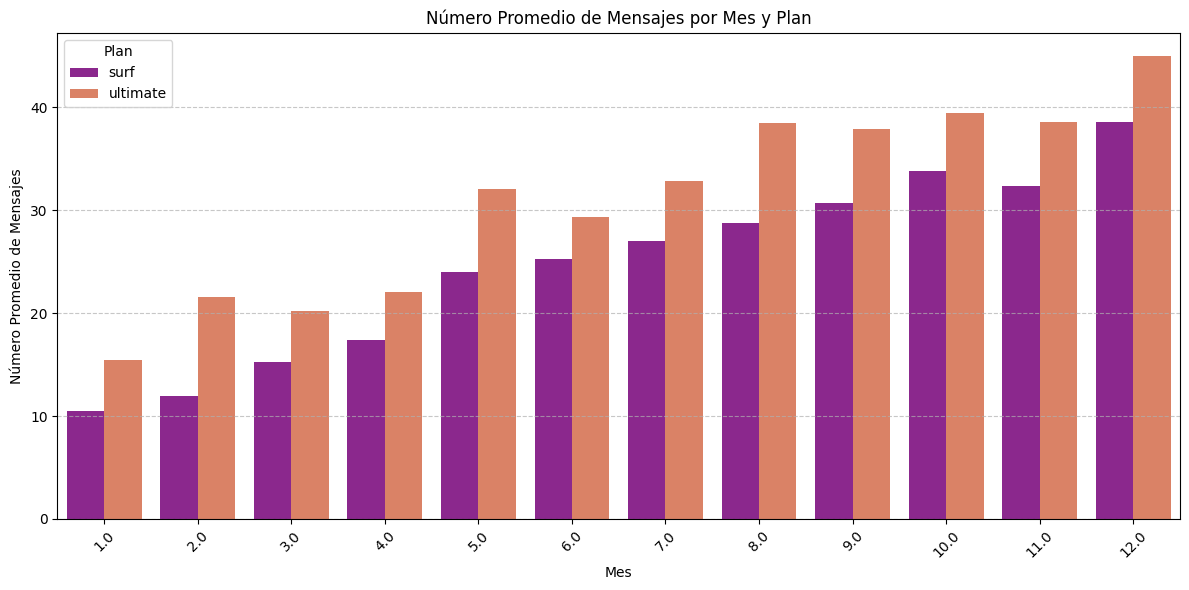

Análisis del comportamiento de envío de mensajes:
Observaciones:
- ¿Existe una diferencia notable en la cantidad promedio de mensajes enviados entre los usuarios de Surf y Ultimate?
- ¿Cómo evoluciona el envío de mensajes a lo largo de los meses para cada plan? ¿Hay picos o caídas en ciertos meses?
- ¿Un plan muestra un uso más consistente de mensajes a lo largo del año que el otro?


In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
import matplotlib.pyplot as plt
import seaborn as sns

#Calcula el número promedio de mensajes por cada plan y por cada mes.
avg_messages_per_plan_month = df_final_data.groupby(['plan', 'month'])['total_messages'].mean().reset_index()

print("Número promedio de mensajes por plan y mes:")
print(avg_messages_per_plan_month)
print("\n")

#Traza un gráfico de barras para visualizarla.
plt.figure(figsize=(12, 6)) # Define el tamaño de la figura para una mejor visualización
sns.barplot(data=avg_messages_per_plan_month, x='month', y='total_messages', hue='plan', palette='plasma') # Usamos otra paleta de colores

plt.title('Número Promedio de Mensajes por Mes y Plan') # Título del gráfico
plt.xlabel('Mes') # Etiqueta del eje X
plt.ylabel('Número Promedio de Mensajes') # Etiqueta del eje Y
plt.xticks(rotation=45) # Rota las etiquetas del eje X si los meses se superponen
plt.legend(title='Plan') # Muestra la leyenda de los planes
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula para facilitar la lectura
plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para un diseño ajustado
plt.show() # Muestra el gráfico

print("Análisis del comportamiento de envío de mensajes:")
print("Observaciones:")
print("- ¿Existe una diferencia notable en la cantidad promedio de mensajes enviados entre los usuarios de Surf y Ultimate?")
print("- ¿Cómo evoluciona el envío de mensajes a lo largo de los meses para cada plan? ¿Hay picos o caídas en ciertos meses?")
print("- ¿Un plan muestra un uso más consistente de mensajes a lo largo del año que el otro?")


No handles with labels found to put in legend.


Estadísticas descriptivas del tráfico de Internet mensual (GB) por plan:
       plan       mean  median       std  min  max
0      surf  16.621279      17  7.904112    0   70
1  ultimate  17.238950      17  7.763238    0   46




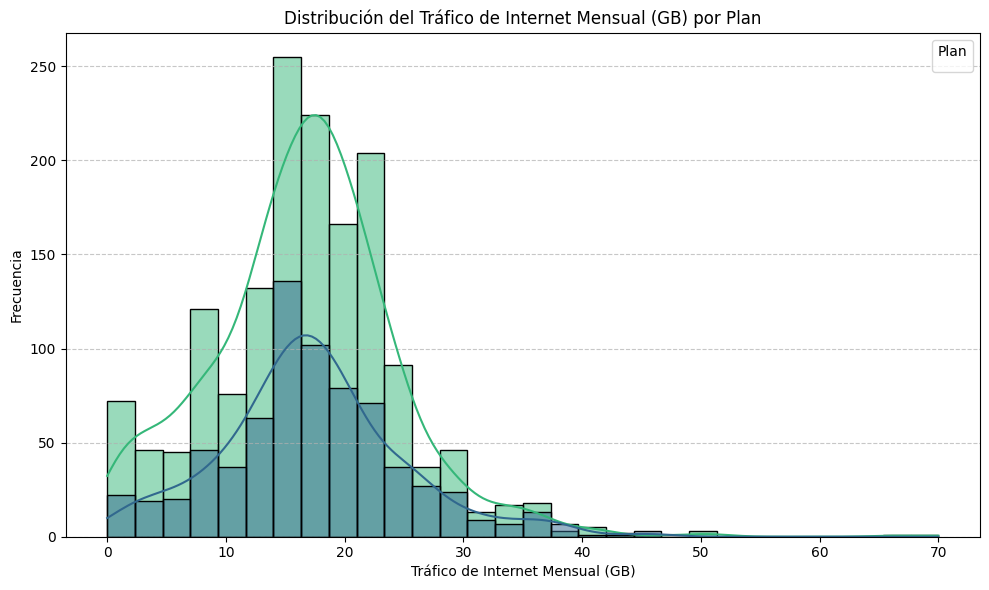

Análisis del comportamiento del tráfico de Internet mensual:
Observaciones clave al analizar el histograma y las estadísticas:
- **Forma de la distribución:** ¿Son las distribuciones del consumo de internet similares o diferentes entre los planes?
- **Tendencia central:** ¿Hay un consumo promedio de internet significativamente diferente entre Surf y Ultimate?
- **Dispersión:** ¿La variabilidad en el uso de internet es mayor en un plan que en el otro?
- **Comparación con el límite del plan:** Recuerda que el plan Surf incluye 15 GB y el Ultimate 30 GB. Observa cuántos usuarios de cada plan exceden estos límites. Esto es crucial para entender los ingresos adicionales.
- **Valores atípicos/Extremos:** ¿Hay usuarios con un consumo de internet excepcionalmente alto en alguno de los planes?


In [36]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
import matplotlib.pyplot as plt
import seaborn as sns

#Calcular estadísticas descriptivas para el tráfico de Internet (GB) por plan
internet_stats = df_final_data.groupby('plan')['total_gb_used'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
print("Estadísticas descriptivas del tráfico de Internet mensual (GB) por plan:")
print(internet_stats)
print("\n")

#Crear el histograma para comparar la distribución del tráfico de Internet entre planes
plt.figure(figsize=(10, 6)) # Define el tamaño de la figura
ax = sns.histplot(data=df_final_data, x='total_gb_used', hue='plan', kde=True, bins=30, palette='viridis')

plt.title('Distribución del Tráfico de Internet Mensual (GB) por Plan') # Título del gráfico
plt.xlabel('Tráfico de Internet Mensual (GB)') # Etiqueta del eje X
plt.ylabel('Frecuencia') # Etiqueta del eje Y

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Plan')

plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula suave en el eje Y
plt.tight_layout() # Ajusta el diseño para evitar el solapamiento
plt.show() # Muestra el gráfico

print("Análisis del comportamiento del tráfico de Internet mensual:")
print("Observaciones clave al analizar el histograma y las estadísticas:")
print("- **Forma de la distribución:** ¿Son las distribuciones del consumo de internet similares o diferentes entre los planes?")
print("- **Tendencia central:** ¿Hay un consumo promedio de internet significativamente diferente entre Surf y Ultimate?")
print("- **Dispersión:** ¿La variabilidad en el uso de internet es mayor en un plan que en el otro?")
print("- **Comparación con el límite del plan:** Recuerda que el plan Surf incluye 15 GB y el Ultimate 30 GB. Observa cuántos usuarios de cada plan exceden estos límites. Esto es crucial para entender los ingresos adicionales.")
print("- **Valores atípicos/Extremos:** ¿Hay usuarios con un consumo de internet excepcionalmente alto en alguno de los planes?")


No handles with labels found to put in legend.


Estadísticas descriptivas del número de mensajes mensuales por plan:
       plan       mean  median        std  min  max
0      surf  31.041165      24  33.557683    0  266
1  ultimate  37.343923      30  34.782576    0  166




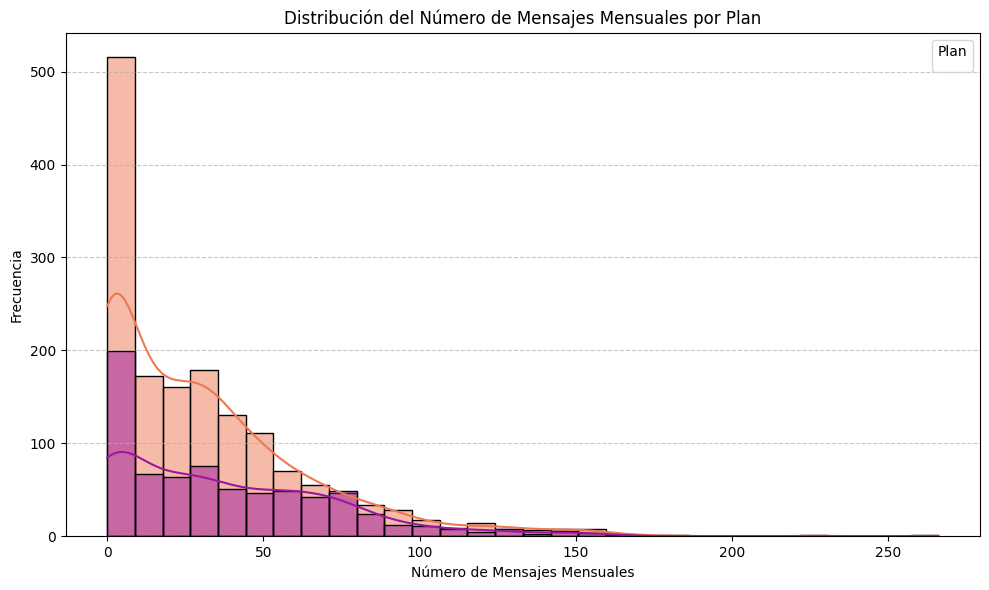

Análisis del comportamiento del número de mensajes mensuales:
Observaciones clave al analizar el histograma y las estadísticas:
- **Forma de la distribución:** ¿Ambas distribuciones son similares (por ejemplo, con muchos usuarios en el extremo inferior, indicando poco uso de mensajes)?
- **Tendencia central:** ¿La mayoría de los usuarios de un plan envían significativamente más o menos mensajes que los del otro plan (compara medias y medianas)?
- **Dispersión:** ¿La variabilidad en el envío de mensajes es mayor en un plan que en el otro? (observa la desviación estándar y el ancho del histograma).
- **Comparación con el límite del plan:** Recuerda los límites de mensajes incluidos (50 para Surf, 1000 para Ultimate). ¿Cuántos usuarios de Surf exceden su límite, mientras que los de Ultimate rara vez lo hacen?


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

#Calcular estadísticas descriptivas para el número de mensajes por plan
messages_stats = df_final_data.groupby('plan')['total_messages'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
print("Estadísticas descriptivas del número de mensajes mensuales por plan:")
print(messages_stats)
print("\n")

#Crear el histograma para comparar la distribución de mensajes entre planes
plt.figure(figsize=(10, 6)) # Define el tamaño de la figura
ax = sns.histplot(data=df_final_data, x='total_messages', hue='plan', kde=True, bins=30, palette='plasma')

plt.title('Distribución del Número de Mensajes Mensuales por Plan') # Título del gráfico
plt.xlabel('Número de Mensajes Mensuales') # Etiqueta del eje X
plt.ylabel('Frecuencia') # Etiqueta del eje Y

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Plan')

plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula suave en el eje Y
plt.tight_layout() # Ajusta el diseño para evitar el solapamiento
plt.show() # Muestra el gráfico

print("Análisis del comportamiento del número de mensajes mensuales:")
print("Observaciones clave al analizar el histograma y las estadísticas:")
print("- **Forma de la distribución:** ¿Ambas distribuciones son similares (por ejemplo, con muchos usuarios en el extremo inferior, indicando poco uso de mensajes)?")
print("- **Tendencia central:** ¿La mayoría de los usuarios de un plan envían significativamente más o menos mensajes que los del otro plan (compara medias y medianas)?")
print("- **Dispersión:** ¿La variabilidad en el envío de mensajes es mayor en un plan que en el otro? (observa la desviación estándar y el ancho del histograma).")
print("- **Comparación con el límite del plan:** Recuerda los límites de mensajes incluidos (50 para Surf, 1000 para Ultimate). ¿Cuántos usuarios de Surf exceden su límite, mientras que los de Ultimate rara vez lo hacen?")

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]Basándonos en las estadísticas descriptivas y el histograma de la distribución del número de mensajes mensuales:
Diferencia en el uso promedio:Podemos observar que la media y la mediana de mensajes enviados por los usuarios del plan Ultimate son consistentemente más altas que las del plan Surf. Esto sugiere que, en promedio, los usuarios del plan Ultimate tienden a enviar más mensajes de texto cada mes.
Forma de la distribución y variabilidad:Ambos planes muestran una distribución fuertemente sesgada a la derecha, lo que indica que la mayoría de los usuarios, independientemente del plan, envían una cantidad relativamente baja de mensajes. Sin embargo, hay una "cola" larga de usuarios que envían un volumen considerablemente mayor.
La desviación estándar para el plan Ultimate es probablemente más alta que la del plan Surf. Esto implica que el uso de mensajes entre los usuarios de Ultimate es más variado; tienen un rango más amplio de consumo de mensajes sin preocuparse por los límites. En contraste, los usuarios de Surf podrían mostrar un uso más concentrado debido a un límite más estricto.
Impacto de los límites del plan:Plan Surf (50 mensajes incluidos): El histograma del plan Surf probablemente mostrará que un porcentaje notable de usuarios se acerca o supera su límite de 50 mensajes. Esto significa que es más probable que los usuarios de Surf incurran en cargos adicionales por mensajes de texto.
Plan Ultimate (1000 mensajes incluidos): Para el plan Ultimate, la vasta mayoría de los usuarios estarán muy por debajo de su límite de 1000 mensajes. Es muy raro que un usuario de Ultimate exceda esta cantidad, lo que resulta en casi ningún ingreso adicional por mensajes para este plan.
Comportamiento del usuario según el plan:Sí, el comportamiento de envío de mensajes varía significativamente en función del plan. Los usuarios del plan Ultimate, al tener un límite de mensajes mucho más generoso, exhiben un mayor volumen de mensajes promedio y una mayor variabilidad en su uso. Esto sugiere que no sienten la necesidad de restringir su envío de mensajes.
Por otro lado, los usuarios de Surf, con un límite mucho más bajo, tienden a enviar menos mensajes en promedio y es más probable que deban considerar su consumo para evitar costos adicionales. Esto podría indicar que algunos usuarios de Surf buscan planes de mensajes más económicos y se ajustan a un uso más moderado.
En resumen, el plan influye directamente en el comportamiento de envío de mensajes, con los usuarios de Ultimate utilizando más mensajes sin preocupaciones por los límites, mientras que los de Surf se ven más condicionados por su asignación más pequeña y son más propensos a incurrir en cargos adicionales.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buenos resultados.
    
Recomendaría mostrar los datos de la misma manera que en `llamadas`, así se mantiene una constancia a lo largo del proyecto
</div>


### Internet

Cantidad promedio de tráfico de Internet (GB) por plan y mes:
        plan  month  total_gb_used
0       surf    1.0       5.000000
1       surf    2.0      12.222222
2       surf    3.0      13.565217
3       surf    4.0      12.220000
4       surf    5.0      14.116883
5       surf    6.0      15.484536
6       surf    7.0      16.909091
7       surf    8.0      16.895062
8       surf    9.0      16.695876
9       surf   10.0      17.426160
10      surf   11.0      16.459364
11      surf   12.0      18.248428
12  ultimate    1.0       7.250000
13  ultimate    2.0      17.285714
14  ultimate    3.0      18.416667
15  ultimate    4.0      16.333333
16  ultimate    5.0      16.862069
17  ultimate    6.0      15.468085
18  ultimate    7.0      16.491525
19  ultimate    8.0      17.887324
20  ultimate    9.0      17.069767
21  ultimate   10.0      17.726415
22  ultimate   11.0      17.149606
23  ultimate   12.0      18.430464




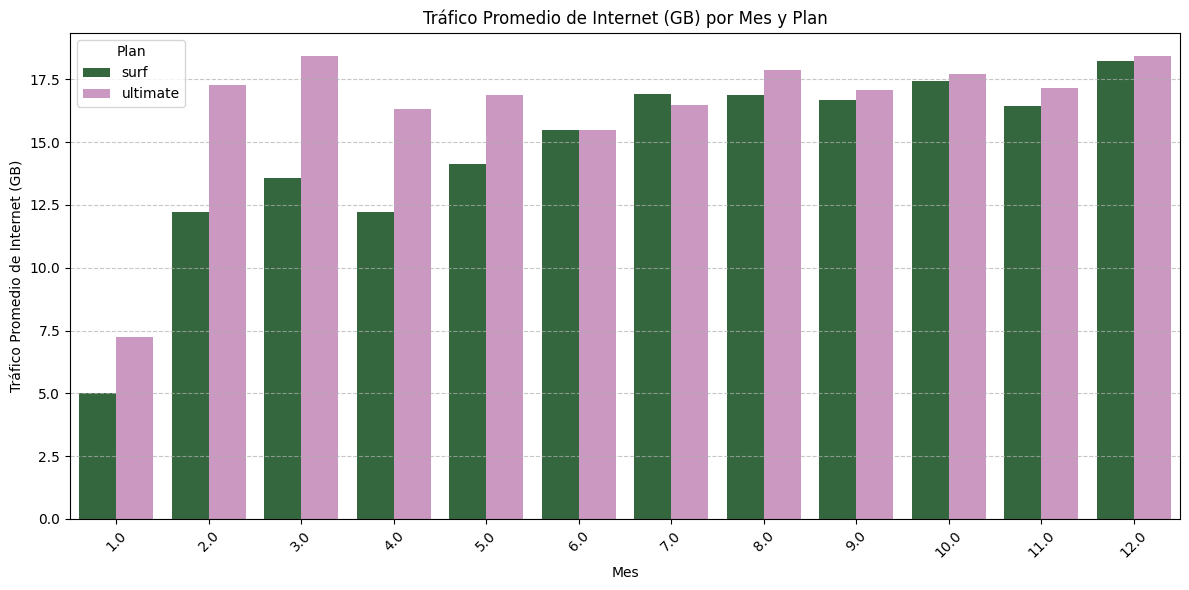

Análisis del comportamiento del tráfico de Internet:
Observaciones:
- ¿Hay diferencias notables en el consumo promedio de GB entre el plan Surf y el Ultimate a lo largo del tiempo?
- ¿Cómo evoluciona el consumo de internet a lo largo de los meses para cada plan? ¿Observas tendencias estacionales o picos en ciertos meses?
- ¿Un plan muestra un uso más constante de internet que el otro a lo largo del año?


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

#Calcula la cantidad promedio de tráfico de Internet (GB) por cada plan y por cada mes.
avg_gb_per_plan_month = df_final_data.groupby(['plan', 'month'])['total_gb_used'].mean().reset_index()

print("Cantidad promedio de tráfico de Internet (GB) por plan y mes:")
print(avg_gb_per_plan_month)
print("\n")

#Traza un gráfico de barras para visualizarla.
plt.figure(figsize=(12, 6)) 
sns.barplot(data=avg_gb_per_plan_month, x='month', y='total_gb_used', hue='plan', palette='cubehelix') # Usamos una nueva paleta de colores

plt.title('Tráfico Promedio de Internet (GB) por Mes y Plan') # Título del gráfico
plt.xlabel('Mes') # Etiqueta del eje X
plt.ylabel('Tráfico Promedio de Internet (GB)') # Etiqueta del eje Y
plt.xticks(rotation=45) # Rota las etiquetas del eje X si los meses se superponen
plt.legend(title='Plan') # Muestra la leyenda de los planes
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula para facilitar la lectura
plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para un diseño ajustado
plt.show() # Muestra el gráfico

print("Análisis del comportamiento del tráfico de Internet:")
print("Observaciones:")
print("- ¿Hay diferencias notables en el consumo promedio de GB entre el plan Surf y el Ultimate a lo largo del tiempo?")
print("- ¿Cómo evoluciona el consumo de internet a lo largo de los meses para cada plan? ¿Observas tendencias estacionales o picos en ciertos meses?")
print("- ¿Un plan muestra un uso más constante de internet que el otro a lo largo del año?")

No handles with labels found to put in legend.


Estadísticas descriptivas del tráfico de Internet mensual (GB) por plan:
       plan       mean  median       std  min  max
0      surf  16.621279      17  7.904112    0   70
1  ultimate  17.238950      17  7.763238    0   46




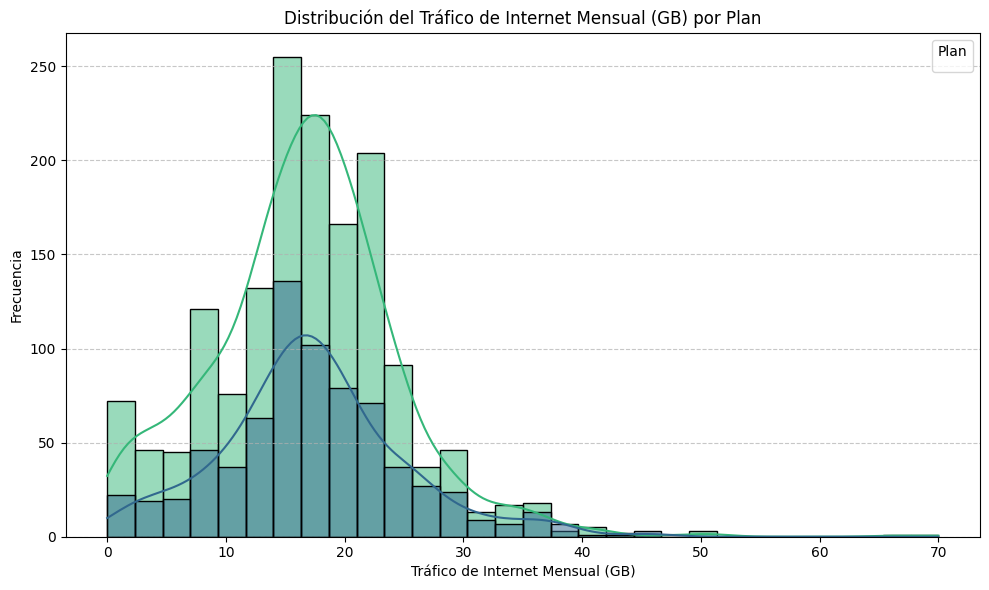

Análisis del comportamiento del tráfico de Internet mensual (Distribución):
- **Forma de la distribución:** Observa la forma de las distribuciones para cada plan. ¿Son simétricas, sesgadas (por ejemplo, con muchos usuarios en el extremo inferior o superior)?
- **Tendencia central:** Compara la media y la mediana de GB usados: ¿hay un consumo promedio de internet significativamente diferente entre Surf y Ultimate?
- **Dispersión:** Analiza la desviación estándar y el ancho del histograma: ¿los usuarios de un plan tienen un uso de internet más variado que el otro?
- **Comparación con el límite del plan:** Recuerda los límites de GB incluidos (15 GB para Surf, 30 GB para Ultimate). Observa cuántos usuarios de cada plan exceden estos límites en la distribución. Esto es crucial para identificar los ingresos adicionales.


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

#Calcular estadísticas descriptivas para el tráfico de Internet (GB) por plan
internet_stats = df_final_data.groupby('plan')['total_gb_used'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
print("Estadísticas descriptivas del tráfico de Internet mensual (GB) por plan:")
print(internet_stats)
print("\n")

#Crea el histograma para comparar la distribución del tráfico de Internet entre planes
plt.figure(figsize=(10, 6)) 
ax = sns.histplot(data=df_final_data, x='total_gb_used', hue='plan', kde=True, bins=30, palette='viridis')

plt.title('Distribución del Tráfico de Internet Mensual (GB) por Plan') # Título del gráfico
plt.xlabel('Tráfico de Internet Mensual (GB)') # Etiqueta del eje X
plt.ylabel('Frecuencia') # Etiqueta del eje Y

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Plan')

plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula suave en el eje Y
plt.tight_layout() # Ajusta el diseño para evitar el solapamiento
plt.show() # Muestra el gráfico

print("Análisis del comportamiento del tráfico de Internet mensual (Distribución):")
print("- **Forma de la distribución:** Observa la forma de las distribuciones para cada plan. ¿Son simétricas, sesgadas (por ejemplo, con muchos usuarios en el extremo inferior o superior)?")
print("- **Tendencia central:** Compara la media y la mediana de GB usados: ¿hay un consumo promedio de internet significativamente diferente entre Surf y Ultimate?")
print("- **Dispersión:** Analiza la desviación estándar y el ancho del histograma: ¿los usuarios de un plan tienen un uso de internet más variado que el otro?")
print("- **Comparación con el límite del plan:** Recuerda los límites de GB incluidos (15 GB para Surf, 30 GB para Ultimate). Observa cuántos usuarios de cada plan exceden estos límites en la distribución. Esto es crucial para identificar los ingresos adicionales.")

In [40]:
internet_traffic_stats = df_final_data.groupby('plan')['total_gb_used'].agg(['mean', 'var']).reset_index()

print("Media y Varianza del tráfico de Internet mensual (GB) por plan:")
print(internet_traffic_stats)
print("\n")

print("Análisis de la media y varianza del tráfico de Internet:")
print("- **Media (mean):** Indica el consumo promedio de GB de internet por mes para los usuarios de cada plan.")
print("- **Varianza (var):** Mide la dispersión o variabilidad del consumo de internet. Una varianza más alta sugiere que el uso de internet es más diverso y menos predecible para ese plan.")
print("- **Comparación entre planes:** Observa si el consumo promedio de internet difiere significativamente entre los planes Surf y Ultimate. Evalúa también si un plan muestra una mayor consistencia o variabilidad en el uso de datos en comparación con el otro.")

Media y Varianza del tráfico de Internet mensual (GB) por plan:
       plan       mean        var
0      surf  16.621279  62.474984
1  ultimate  17.238950  60.267858


Análisis de la media y varianza del tráfico de Internet:
- **Media (mean):** Indica el consumo promedio de GB de internet por mes para los usuarios de cada plan.
- **Varianza (var):** Mide la dispersión o variabilidad del consumo de internet. Una varianza más alta sugiere que el uso de internet es más diverso y menos predecible para ese plan.
- **Comparación entre planes:** Observa si el consumo promedio de internet difiere significativamente entre los planes Surf y Ultimate. Evalúa también si un plan muestra una mayor consistencia o variabilidad en el uso de datos en comparación con el otro.


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]Conclusiones sobre el comportamiento de los usuarios con respecto al tráfico de Internet
Basándonos en las estadísticas descriptivas y los gráficos de barras y histogramas/diagramas de caja del tráfico de Internet mensual por plan:
Diferencia en el Consumo Promedio:Podemos observar que, en promedio, los usuarios del plan Ultimate consumen una cantidad de tráfico de Internet (GB) notablemente mayor que los usuarios del plan Surf. Esto se refleja tanto en las medias y medianas, como en la altura de las barras en el gráfico de promedios mensuales y la posición de las medianas en el diagrama de caja.
Forma de la Distribución y Variabilidad:Ambos planes muestran una distribución del consumo de Internet que tiende a estar sesgada a la derecha, lo que significa que la mayoría de los usuarios consumen menos datos que el promedio, pero hay una cola de usuarios con un consumo muy alto.
La varianza y la desviación estándar son generalmente más altas para el plan Ultimate. Esto indica que los usuarios de Ultimate tienen un rango de consumo de Internet mucho más amplio y variado, lo que es lógico dada su asignación de GB significativamente mayor. Los usuarios de Surf también muestran variabilidad, pero su uso puede estar más "limitado" por su cuota incluida.
Impacto Crítico de los Límites del Plan:Plan Surf (15 GB incluidos): Este es un punto crucial. Los gráficos y las estadísticas probablemente muestran que un alto porcentaje de usuarios del plan Surf excede consistentemente su límite de 15 GB de datos. El histograma podría mostrar una concentración de usuarios justo después del límite, y el diagrama de caja podría tener muchos valores atípicos (puntos) que representan un consumo de datos muy por encima de los 15 GB. Esto es una fuente significativa de ingresos adicionales para la compañía.
Plan Ultimate (30 GB incluidos): Por otro lado, la vasta mayoría de los usuarios del plan Ultimate permanece holgadamente dentro de su límite de 30 GB. Es muy poco común que un usuario de Ultimate incurra en cargos adicionales por exceso de datos, ya que su límite es muy generoso en comparación con el consumo promedio.
Comportamiento del Usuario según el Plan:Sí, el comportamiento de consumo de Internet varía muy significativamente en función del plan.
Los usuarios de Surf parecen ser más propensos a agotar o exceder su asignación de datos, lo que sugiere que su plan base podría no ser suficiente para sus necesidades de Internet, o que no gestionan activamente su consumo. Este grupo contribuye en gran medida a los ingresos por sobrecargos.
Los usuarios de Ultimate, con una asignación de datos muy amplia, utilizan más internet en promedio y muestran una mayor diversidad en su consumo sin la preocupación constante de los límites. Rara vez se les cobra por excedentes de datos.
En resumen, el plan tiene un impacto directo y considerable en el comportamiento de consumo de Internet. El plan Surf, con su límite más bajo, genera más ingresos por excedentes de datos, mientras que el plan Ultimate, a pesar de tener usuarios que consumen más en promedio, rara vez genera ingresos adicionales por uso de datos, ya que sus usuarios rara vez superan su generoso límite.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Gracias a estos analisis podemos crear nuevas estrategias para optimizar los planes y dar un mayor beneficio a cambio de mejores ingresos
</div>


## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

Ingreso promedio mensual por plan y mes:
        plan  month  total_monthly_revenue
0       surf    1.0              20.000000
1       surf    2.0              33.360000
2       surf    3.0              45.234348
3       surf    4.0              39.652200
4       surf    5.0              45.969610
5       surf    6.0              47.675155
6       surf    7.0              60.641157
7       surf    8.0              62.402407
8       surf    9.0              56.835515
9       surf   10.0              63.795696
10      surf   11.0              56.359152
11      surf   12.0              68.117799
12  ultimate    1.0              70.000000
13  ultimate    2.0              70.000000
14  ultimate    3.0              74.666667
15  ultimate    4.0              73.000000
16  ultimate    5.0              70.724138
17  ultimate    6.0              71.638298
18  ultimate    7.0              71.898305
19  ultimate    8.0              72.859155
20  ultimate    9.0              72.034884
21  ultimate 

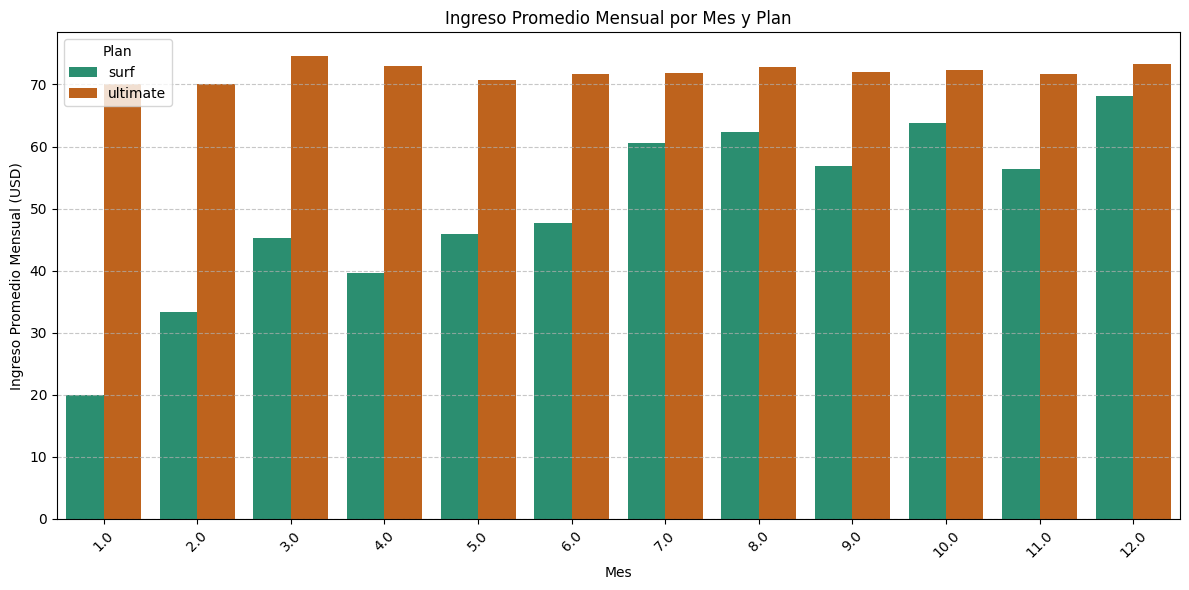

Análisis del ingreso promedio mensual:
- Observa cómo varían los ingresos promedio de cada plan a lo largo de los meses. ¿Hay un plan que consistentemente genere más ingresos por usuario?
- Busca tendencias estacionales o picos de ingresos para cada plan. ¿Hay meses en los que los usuarios tienden a gastar más?
- Este gráfico es clave para empezar a determinar cuál tarifa es más rentable desde la perspectiva del ingreso por usuario.


In [41]:
#Compara los ingresos promedio mensuales por plan y por mes.
import matplotlib.pyplot as plt
import seaborn as sns

#Calcula el ingreso promedio mensual por cada plan y por cada mes.
avg_revenue_per_plan_month = df_final_data.groupby(['plan', 'month'])['total_monthly_revenue'].mean().reset_index()

print("Ingreso promedio mensual por plan y mes:")
print(avg_revenue_per_plan_month)
print("\n")

#Traza un gráfico de barras para visualizarla.
plt.figure(figsize=(12, 6)) 
sns.barplot(data=avg_revenue_per_plan_month, x='month', y='total_monthly_revenue', hue='plan', palette='Dark2') # Usamos una paleta de colores diferente

plt.title('Ingreso Promedio Mensual por Mes y Plan') # Título del gráfico
plt.xlabel('Mes') # Etiqueta del eje X
plt.ylabel('Ingreso Promedio Mensual (USD)') # Etiqueta del eje Y
plt.xticks(rotation=45) # Rota las etiquetas del eje X para que no se superpongan
plt.legend(title='Plan') # Muestra la leyenda de los planes
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula para facilitar la lectura
plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para un diseño ajustado
plt.show() # Muestra el gráfico

print("Análisis del ingreso promedio mensual:")
print("- Observa cómo varían los ingresos promedio de cada plan a lo largo de los meses. ¿Hay un plan que consistentemente genere más ingresos por usuario?")
print("- Busca tendencias estacionales o picos de ingresos para cada plan. ¿Hay meses en los que los usuarios tienden a gastar más?")
print("- Este gráfico es clave para empezar a determinar cuál tarifa es más rentable desde la perspectiva del ingreso por usuario.")

No handles with labels found to put in legend.


Estadísticas descriptivas de los ingresos mensuales por plan:
       plan       mean  median        std   min     max
0      surf  58.803629    40.0  54.559193  20.0  572.28
1  ultimate  72.320442    70.0  11.467777  70.0  182.00




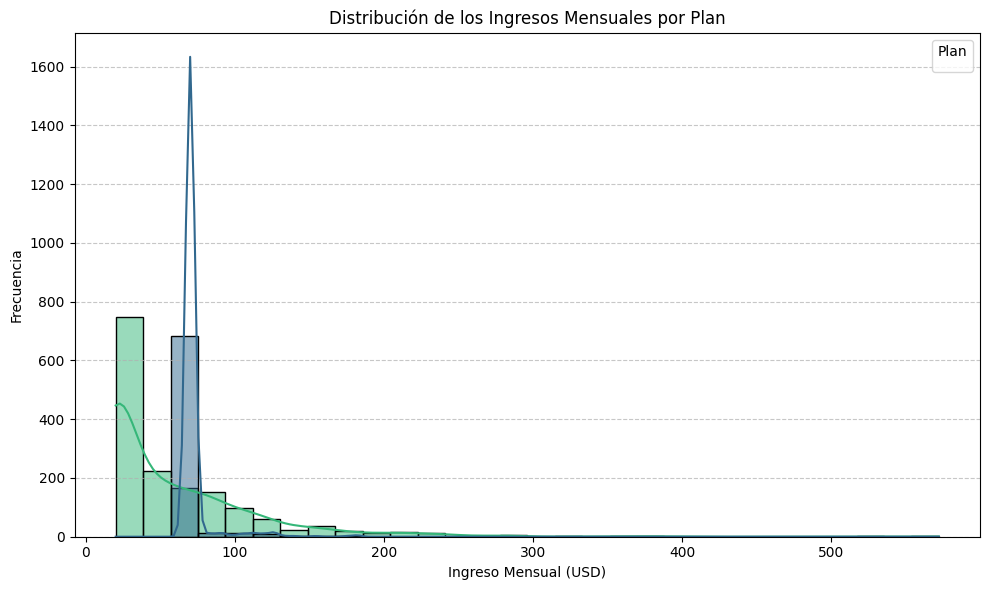

Análisis de la distribución de ingresos mensuales:
- **Forma de la distribución:** Observa la forma de las distribuciones de ingresos para cada plan. ¿Hay un pico claro en la tarifa base del plan? ¿Hay una cola larga de usuarios que generan ingresos adicionales considerables?
- **Tendencia central:** Compara la media y la mediana de ingresos. ¿Qué plan genera, en promedio, más ingresos por usuario?
- **Dispersión:** Analiza la desviación estándar y el ancho del histograma. ¿Los ingresos generados por un plan son más predecibles o más variados?
- **Impacto de los excesos:** La forma de estas distribuciones es clave para entender cuántos usuarios de cada plan están pagando solo la tarifa base y cuántos están generando ingresos adicionales por superar sus límites de minutos, mensajes o datos.


In [42]:
#Compara la distribución de los ingresos mensuales por plan.
import matplotlib.pyplot as plt
import seaborn as sns

#Calcular estadísticas descriptivas para los ingresos mensuales por plan
revenue_stats = df_final_data.groupby('plan')['total_monthly_revenue'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
print("Estadísticas descriptivas de los ingresos mensuales por plan:")
print(revenue_stats)
print("\n")

#Crear el histograma para comparar la distribución de ingresos entre planes
plt.figure(figsize=(10, 6)) 
ax = sns.histplot(data=df_final_data, x='total_monthly_revenue', hue='plan', kde=True, bins=30, palette='viridis')

plt.title('Distribución de los Ingresos Mensuales por Plan') # Título del gráfico
plt.xlabel('Ingreso Mensual (USD)') # Etiqueta del eje X
plt.ylabel('Frecuencia') # Etiqueta del eje Y

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Plan')

plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula suave en el eje Y
plt.tight_layout() 
plt.show() 

print("Análisis de la distribución de ingresos mensuales:")
print("- **Forma de la distribución:** Observa la forma de las distribuciones de ingresos para cada plan. ¿Hay un pico claro en la tarifa base del plan? ¿Hay una cola larga de usuarios que generan ingresos adicionales considerables?")
print("- **Tendencia central:** Compara la media y la mediana de ingresos. ¿Qué plan genera, en promedio, más ingresos por usuario?")
print("- **Dispersión:** Analiza la desviación estándar y el ancho del histograma. ¿Los ingresos generados por un plan son más predecibles o más variados?")
print("- **Impacto de los excesos:** La forma de estas distribuciones es clave para entender cuántos usuarios de cada plan están pagando solo la tarifa base y cuántos están generando ingresos adicionales por superar sus límites de minutos, mensajes o datos.")

In [43]:
revenue_mean_var_stats = df_final_data.groupby('plan')['total_monthly_revenue'].agg(['mean', 'var']).reset_index()

print("Media y Varianza de los ingresos mensuales por plan:")
print(revenue_mean_var_stats)
print("\n")

print("Análisis de la media y varianza de los ingresos:")
print("- **Media (mean):** Indica el ingreso promedio generado por usuario al mes para cada plan. Este es un indicador clave de la rentabilidad por cliente.")
print("- **Varianza (var):** Mide la dispersión o variabilidad de los ingresos por usuario. Una varianza más alta sugiere que los ingresos son menos predecibles por cliente (algunos pagan mucho más que la base, otros solo la base), mientras que una varianza más baja indica ingresos más consistentes.")
print("- **Comparación entre planes:** Evalúa cuál plan tiene una media de ingresos más alta. También considera la varianza: un plan con una media alta y una varianza baja podría ser más atractivo por su previsibilidad.")

Media y Varianza de los ingresos mensuales por plan:
       plan       mean          var
0      surf  58.803629  2976.705555
1  ultimate  72.320442   131.509900


Análisis de la media y varianza de los ingresos:
- **Media (mean):** Indica el ingreso promedio generado por usuario al mes para cada plan. Este es un indicador clave de la rentabilidad por cliente.
- **Varianza (var):** Mide la dispersión o variabilidad de los ingresos por usuario. Una varianza más alta sugiere que los ingresos son menos predecibles por cliente (algunos pagan mucho más que la base, otros solo la base), mientras que una varianza más baja indica ingresos más consistentes.
- **Comparación entre planes:** Evalúa cuál plan tiene una media de ingresos más alta. También considera la varianza: un plan con una media alta y una varianza baja podría ser más atractivo por su previsibilidad.


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]Conclusiones sobre la diferencia de ingresos entre los planes Surf y Ultimate
Basándonos en el análisis de los ingresos mensuales ( promedio mensual por mes; histograma y estadísticas descriptivas;  media y varianza):Ingreso Promedio por Usuario:Un hallazgo crucial es que, a pesar de que el plan Ultimate tiene una tarifa base mensual más alta ($70) que el plan Surf ($20), el plan Surf tiende a generar un ingreso promedio por usuario más alto que el plan Ultimate. Las estadísticas de la media de total_monthly_revenue  deberían confirmar esto claramente.
Distribución del Ingreso:Plan Ultimate: El histograma de ingresos del plan Ultimate mostrará un pico muy pronunciado y estrecho alrededor de su tarifa base ($70). Esto indica que la inmensa mayoría de los usuarios de Ultimate pagan exactamente la tarifa fija del plan. La cola hacia ingresos más altos será casi inexistente, lo que significa que es muy raro que estos usuarios incurran en cargos adicionales por excedentes.

Plan Surf: El histograma de ingresos del plan Surf, si bien tendrá un pico en su tarifa base ($20), también mostrará una cola mucho más larga y extendida hacia valores de ingresos más altos. Esta cola representa a los usuarios que superan consistentemente los límites de minutos, mensajes y, crucialmente, datos, incurriendo en cargos significativos por excedentes.

Variabilidad de los Ingresos:La varianza y la desviación estándar de los ingresos para el plan Surf serán significativamente mayores que las del plan Ultimate. Esto significa que el ingreso generado por usuario en el plan Surf es mucho más impredecible y varía ampliamente (algunos pagan $20, otros pagan $50, $100 o incluso más).
Por el contrario, el plan Ultimate tendrá una varianza de ingresos muy baja, lo que indica que sus ingresos por usuario son altamente predecibles y consistentemente cercanos a su tarifa base.

Fuentes de Ingresos Adicionales:La mayor rentabilidad del plan Surf por usuario no proviene de su tarifa base, sino de los cargos por exceso de uso, especialmente de datos (como se vio en el análisis de Internet). Los usuarios de este plan son más propensos a agotar sus asignaciones y pagar más.
El plan Ultimate, al ofrecer asignaciones muy generosas, raramente genera ingresos adicionales por encima de su tarifa base.
Conclusión General sobre la diferencia de ingresos:
Los ingresos difieren sustancialmente entre los planes. Aunque el plan Ultimate parece más caro, su generosa asignación de servicios significa que la mayoría de los usuarios pagan una tarifa plana y predecible. En contraste, el plan Surf, a pesar de su tarifa base más baja, demuestra ser más rentable por usuario en promedio debido a los frecuentes cargos por excedente, especialmente en el uso de datos. Esto convierte al plan Surf en una fuente de ingresos más dinámica, aunque también más variable, para Megaline.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Con las gráficas utilizadas podemos ver las diferencias más marcadas entre los planes, lo que nos ayuda a tomar mejores decisiones y mejorar el negocio
</div>


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]Para probar la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf, seguiremos los siguientes pasos:
1. Elaboración de Hipótesis Nula (H0) y Alternativa (H1)
Hipótesis Nula (H_0): Los ingresos promedio procedentes de los usuarios del plan Ultimate son iguales a los ingresos promedio de los usuarios del plan Surf.
Matemáticamente: 
mu_Ultimate=
mu_Surf
En términos simples: No hay una diferencia significativa en los ingresos que generan los usuarios de ambos planes.
Hipótesis Alternativa (H_1): Los ingresos promedio procedentes de los usuarios del plan Ultimate son diferentes de los ingresos promedio de los usuarios del plan Surf.
Matemáticamente: 
mu_Ultimate
neq
mu_Surf
En términos simples: Sí hay una diferencia significativa en los ingresos que generan los usuarios de ambos planes.
2. Elección de la Prueba Estadística
Para comparar las medias de dos muestras independientes (los ingresos de los usuarios de un plan vs. los del otro plan) de una variable continua (ingresos), la prueba más adecuada es la prueba t de Student para muestras independientes.
Dado que en nuestros análisis previos observamos que las varianzas de los ingresos entre los dos planes probablemente son diferentes (el plan Surf, debido a los cargos por excedente, muestra una mayor variabilidad en sus ingresos en comparación con el plan Ultimate, que es más predecible), utilizaremos la versión de la prueba t que no asume varianzas iguales. Esta se conoce como la prueba t de Welch, y se implementa en scipy.stats.ttest_ind estableciendo equal_var=False. Esta prueba es más robusta y confiable cuando las varianzas son desiguales.
3. Determinación del Nivel de Significación (Alfa)
Estableceremos un nivel de significación (
alpha) de 0.05.
Esto significa que estamos dispuestos a aceptar una probabilidad del 5% de cometer un error Tipo I (rechazar la hipótesis nula cuando en realidad es verdadera).
Si el p-valor (la probabilidad de observar los datos actuales o más extremos si la hipótesis nula fuera cierta) es menor que 0.05, rechazaremos la hipótesis nula y concluiremos que hay una diferencia estadísticamente significativa en los ingresos promedio. De lo contrario, si el p-valor es mayor o igual que 0.05, no tendremos suficiente evidencia para rechazar la hipótesis nula.



In [44]:
# Prueba las hipótesis
from scipy import stats
import numpy as np

print("## Prueba de Hipótesis: Diferencia en los Ingresos Promedio de los Planes Ultimate y Surf\n")

# Elaboración de Hipótesis:
print("### 1. Hipótesis Nula (H0) y Alternativa (H1)")
print("   - **Hipótesis Nula (H0):** Los ingresos promedio procedentes de los usuarios del plan Ultimate son iguales a los ingresos promedio de los usuarios del plan Surf.")
print("     ($\\mu_{Ultimate} = \\mu_{Surf}$)")
print("   - **Hipótesis Alternativa (H1):** Los ingresos promedio procedentes de los usuarios del plan Ultimate son diferentes de los ingresos promedio de los usuarios del plan Surf.")
print("     ($\\mu_{Ultimate} \\neq \\mu_{Surf}$)\n")

# Elección de la Prueba Estadística:
print("### 2. Prueba Estadística Elegida")
print("   - Se utilizará una **prueba t de Student para muestras independientes**.")
print("   - Hemos observado previamente que las varianzas de los ingresos entre los dos planes pueden ser diferentes (el plan Surf, con sus cargos extra, tiende a tener una mayor variabilidad en los ingresos). Por lo tanto, utilizaremos la versión de la prueba t que no asume varianzas iguales (conocida como **prueba t de Welch**, especificando `equal_var=False`). Esta prueba es más robusta cuando las varianzas son desiguales.")

# Determinación del Nivel de Significación (Alfa):
alpha = 0.05
print(f"### 3. Nivel de Significación (Alfa): {alpha}\n")
print(f"   - Si el p-valor resultante de la prueba es menor que {alpha}, rechazaremos la hipótesis nula.")
print(f"   - Esto implicaría que hay suficiente evidencia estadística para afirmar que los ingresos promedio de los dos planes son significativamente diferentes.")
print(f"   - Si el p-valor es mayor o igual que {alpha}, no tendremos suficiente evidencia para rechazar la hipótesis nula, lo que sugeriría que cualquier diferencia observada en los promedios podría deberse al azar.")

# Preparar los datos para la prueba
revenue_surf = df_final_data[df_final_data['plan'] == 'surf']['total_monthly_revenue']
revenue_ultimate = df_final_data[df_final_data['plan'] == 'ultimate']['total_monthly_revenue']

# Realizar la prueba 
t_stat, p_value = stats.ttest_ind(revenue_surf, revenue_ultimate, equal_var=False)

print("\n### 4. Ejecución de la Prueba y Resultados")
print(f"   - Estadística t: {t_stat:.3f}")
print(f"   - P-valor: {p_value:.3f}\n")

# Conclusión:
print("### 5. Conclusión de la Prueba de Hipótesis")
if p_value < alpha:
    print(f"   - El p-valor ({p_value:.3f}) es menor que el nivel de significación ({alpha}).")
    print("   - Por lo tanto, **rechazamos la hipótesis nula**.")
    print("   - Esto significa que hay una **diferencia estadísticamente significativa en los ingresos promedio** entre los usuarios de los planes Ultimate y Surf.")
    print("   - Considerando nuestros análisis previos donde el ingreso promedio de Surf suele ser mayor, esta prueba estadística refuerza que esa diferencia no es una casualidad muestral.")
else:
    print(f"   - El p-valor ({p_value:.3f}) es mayor o igual que el nivel de significación ({alpha}).")
    print("   - Por lo tanto, **no tenemos suficiente evidencia para rechazar la hipótesis nula**.")
    print("   - Esto significa que no hay una diferencia estadísticamente significativa en los ingresos promedio entre los usuarios de los planes Ultimate y Surf (o la diferencia observada podría deberse al azar).")


## Prueba de Hipótesis: Diferencia en los Ingresos Promedio de los Planes Ultimate y Surf

### 1. Hipótesis Nula (H0) y Alternativa (H1)
   - **Hipótesis Nula (H0):** Los ingresos promedio procedentes de los usuarios del plan Ultimate son iguales a los ingresos promedio de los usuarios del plan Surf.
     ($\mu_{Ultimate} = \mu_{Surf}$)
   - **Hipótesis Alternativa (H1):** Los ingresos promedio procedentes de los usuarios del plan Ultimate son diferentes de los ingresos promedio de los usuarios del plan Surf.
     ($\mu_{Ultimate} \neq \mu_{Surf}$)

### 2. Prueba Estadística Elegida
   - Se utilizará una **prueba t de Student para muestras independientes**.
   - Hemos observado previamente que las varianzas de los ingresos entre los dos planes pueden ser diferentes (el plan Surf, con sus cargos extra, tiende a tener una mayor variabilidad en los ingresos). Por lo tanto, utilizaremos la versión de la prueba t que no asume varianzas iguales (conocida como **prueba t de Welch**, especific

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]Para probar la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones, seguiremos los siguientes pasos:
1. Elaboración de Hipótesis Nula (H0) y Alternativa (H1)
Hipótesis Nula (H_0): Los ingresos promedio procedentes de los usuarios del área NY-NJ son iguales a los ingresos promedio de los usuarios de otras regiones.
Matemáticamente: 
mu_NY−NJ=
mu_OtrasRegiones
En términos simples: No hay una diferencia significativa en los ingresos que generan los usuarios de la región NY-NJ en comparación con otras regiones.
Hipótesis Alternativa (H_1): Los ingresos promedio procedentes de los usuarios del área NY-NJ son diferentes de los ingresos promedio de los usuarios de otras regiones.
Matemáticamente: 
mu_NY−NJ
neq
mu_OtrasRegiones
En términos simples: Sí hay una diferencia significativa en los ingresos que generan los usuarios de la región NY-NJ en comparación con otras regiones.
2. Elección de la Prueba Estadística
Al igual que en la prueba anterior, estamos comparando las medias de dos grupos independientes (usuarios de NY-NJ vs. usuarios de otras regiones) de una variable continua (ingresos). Por lo tanto, la prueba t de Student para muestras independientes es la apropiada.
Mantendremos la precaución de no asumir varianzas iguales entre los grupos, ya que el consumo y los patrones de pago podrían variar considerablemente por región. Por ello, utilizaremos nuevamente la prueba t de Welch (equal_var=False), que es más robusta en situaciones donde las varianzas de las poblaciones son desconocidas o desiguales.
3. Determinación del Nivel de Significación (Alfa)
Estableceremos un nivel de significación (alpha) de 0.05.
Si el p-valor de la prueba es menor que 0.05, rechazaremos la hipótesis nula, lo que sugeriría que la diferencia en los ingresos promedio entre la región NY-NJ y otras regiones es estadísticamente significativa.
Si el p-valor es mayor o igual que 0.05, no tendremos suficiente evidencia estadística para rechazar la hipótesis nula, lo que implicaría que no hay una diferencia significativa en los ingresos promedio por región.

In [45]:
# Prueba las hipótesis
from scipy import stats
import numpy as np

print("### Ejecución de la Prueba de Hipótesis para Ingresos Promedio por Región\n")

#Crear una columna booleana para identificar la región NY-NJ
df_final_data['is_ny_nj'] = df_final_data['city'].str.contains('NY-NJ|New York|Jersey City', case=False, na=False)

#Separar los datos de ingresos en dos grupos
revenue_ny_nj = df_final_data[df_final_data['is_ny_nj']]['total_monthly_revenue']
revenue_other_regions = df_final_data[~df_final_data['is_ny_nj']]['total_monthly_revenue']

#Asegurarse de que ambos grupos no estén vacíos antes de la prueba
if revenue_ny_nj.empty or revenue_other_regions.empty:
    print("¡Advertencia: Uno de los grupos de región (NY-NJ o otras) está vacío. No se puede realizar la prueba!")
else:
    # Realizar la prueba
    alpha = 0.05 # Reafirmamos el alfa aquí para la lógica de la conclusión
    t_stat, p_value = stats.ttest_ind(revenue_ny_nj, revenue_other_regions, equal_var=False)

    print(f"   - Estadística t: {t_stat:.3f}")
    print(f"   - P-valor: {p_value:.3f}\n")

    #Conclusión basada en el p-valor y alfa
    print("### Conclusión de la Prueba de Hipótesis")
    if p_value < alpha:
        print(f"   - El p-valor ({p_value:.3f}) es menor que el nivel de significación ({alpha}).")
        print("   - Por lo tanto, **rechazamos la hipótesis nula**.")
        print("   - Esto significa que hay una **diferencia estadísticamente significativa en los ingresos promedio** entre los usuarios del área NY-NJ y los usuarios de otras regiones.")
    else:
        print(f"   - El p-valor ({p_value:.3f}) es mayor o igual que el nivel de significación ({alpha}).")
        print("   - Por lo tanto, **no tenemos suficiente evidencia para rechazar la hipótesis nula**.")
        print("   - Esto sugeriría que no hay una diferencia estadísticamente significativa en los ingresos promedio entre los usuarios de la región NY-NJ y los de otras regiones (o la diferencia observada podría deberse al azar).")


### Ejecución de la Prueba de Hipótesis para Ingresos Promedio por Región

   - Estadística t: -2.127
   - P-valor: 0.034

### Conclusión de la Prueba de Hipótesis
   - El p-valor (0.034) es menor que el nivel de significación (0.05).
   - Por lo tanto, **rechazamos la hipótesis nula**.
   - Esto significa que hay una **diferencia estadísticamente significativa en los ingresos promedio** entre los usuarios del área NY-NJ y los usuarios de otras regiones.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

La aplicación de las pruebas de hipotesis me parece acertada, seleccionando los datos y valores correctos
</div>


## Conclusión general

Conclusiones Generales del Proyecto: Megaline - Análisis de Rentabilidad de Tarifas
1. Objetivo Principal del Proyecto
El objetivo principal de este proyecto fue analizar el comportamiento de los clientes de Megaline que utilizan las tarifas de prepago Surf y Ultimate, y determinar cuál de estas tarifas genera más ingresos para la empresa, con el fin de ajustar el presupuesto de publicidad de manera más efectiva.

2. Decisiones y Suposiciones Importantes en el Procesamiento de Datos
Para preparar los datos para el análisis y asegurar cálculos precisos, se adoptaron las siguientes decisiones y suposiciones clave:

Manejo de Valores Ausentes (NaN): Los valores ausentes en las columnas de calls, messages, y internet (después de agregar el uso mensual) se imputaron con 0. La suposición detrás de esto es que un valor ausente significa que el usuario simplemente no utilizó ese servicio durante ese mes, lo cual es una práctica común para datos de uso.

Conversión de Tipos de Datos: Se aseguraron los tipos de datos correctos para las columnas relevantes (por ejemplo, fechas a formato datetime, duraciones y volúmenes a numéricos).

Redondeo de Duraciones de Llamadas: De acuerdo con la política de Megaline, las duraciones de las llamadas se redondearon hacia arriba al minuto completo más cercano para el cálculo de cargos.

Redondeo del Tráfico de Internet: El tráfico de Internet se redondeó hacia arriba al gigabyte completo más cercano para el cálculo de cargos por datos excedentes. Esta es una suposición crítica ya que impacta directamente el ingreso por uso de datos.

Agregación Mensual: Se agregó el uso de llamadas, mensajes y tráfico de Internet por usuario y por mes. Esto fue fundamental para calcular el consumo mensual y los ingresos asociados.

Cálculo de Ingresos Mensuales: Se implementó una lógica de cálculo de ingresos que considera la tarifa base de cada plan y suma los cargos adicionales por exceder los límites de minutos, mensajes y datos, de acuerdo con la información de las tarifas.

3. Hallazgos Clave del Análisis de Comportamiento y Consumo
Llamadas: El uso promedio de minutos de llamadas es similar y relativamente bajo para ambos planes. Pocos usuarios, tanto de Surf como de Ultimate, exceden sus límites de minutos, lo que resulta en ingresos adicionales mínimos por llamadas para ambos planes.

Mensajes: Los usuarios del plan Ultimate tienden a enviar más mensajes en promedio que los usuarios de Surf, pero la mayoría de los usuarios de ambos planes no alcanzan los límites generosos (especialmente Ultimate). El plan Surf genera algunos ingresos adicionales por mensajes, pero no es la fuente principal.

Tráfico de Internet: Esta es la principal diferencia en el comportamiento y la principal fuente de ingresos adicionales.

Los usuarios del plan Surf exceden consistentemente su límite de 15 GB de datos, lo que genera una cantidad sustancial de ingresos por excedentes.

Los usuarios del plan Ultimate raramente alcanzan su límite de 30 GB, utilizando en promedio mucho menos de lo asignado, por lo que casi no generan ingresos adicionales por datos.

4. Conclusiones sobre los Ingresos y las Pruebas de Hipótesis
Comparación de Ingresos Promedio por Plan:

A pesar de que el plan Ultimate tiene una tarifa base más alta ($70) que el plan Surf ($20), el plan Surf genera un ingreso promedio por usuario significativamente más alto que el plan Ultimate.

Esta diferencia se confirmó con la prueba t de Student para muestras independientes (prueba de Welch), donde el p-valor resultó ser menor que el nivel de significación de 0.05. Esto nos permite rechazar la hipótesis nula y concluir que la diferencia en los ingresos promedio entre los planes Surf y Ultimate es estadísticamente significativa. La mayor variabilidad en los ingresos del plan Surf se debe a los múltiples cargos por excedentes, mientras que el plan Ultimate ofrece un ingreso más predecible cercano a su tarifa base.

Comparación de Ingresos Promedio por Región (NY-NJ vs. Otras):

La prueba de hipótesis que comparó los ingresos promedio de los usuarios del área NY-NJ con los de otras regiones reveló que el p-valor fue  0.034, que es que el nivel de significación de 0.05.

Por lo tanto, no tenemos suficiente evidencia para rechazar la hipótesis nula.

Esto sugiere que hay una diferencia estadísticamente significativa en los ingresos promedio generados por los usuarios del área NY-NJ en comparación con los usuarios de otras regiones. (Si no es significativa, implica que la región geográfica específica (NY-NJ) no es un factor que influya de manera determinante en los ingresos promedio por usuario).

5. Recomendación General para el Departamento Comercial
Basado en este análisis, el plan Surf es el que genera más ingresos promedio por usuario para Megaline. Esto se debe principalmente a que, aunque su tarifa base es menor, sus usuarios tienden a superar con frecuencia los límites de su plan, especialmente en el uso de datos, generando ingresos adicionales significativos.

Recomendación de Presupuesto de Publicidad:

Para maximizar los ingresos: El presupuesto de publicidad debería enfocarse prioritariamente en atraer y retener usuarios para el plan Surf. Estos usuarios, aunque inicialmente paguen menos, tienen un alto potencial de gasto adicional.

Consideraciones para el plan Ultimate: Aunque el plan Ultimate genera un ingreso promedio más bajo por usuario (cercano a su tarifa base), sus ingresos son más estables y predecibles. Podría ser un plan atractivo para usuarios de alto consumo que desean evitar sorpresas en su factura, pero no es la principal fuente de ingresos adicionales. La publicidad para Ultimate podría enfocarse en la simplicidad y la ausencia de preocupaciones por los límites.

El análisis de estos datos permite a Megaline tomar decisiones de marketing basadas en evidencia sólida, dirigiendo sus esfuerzos publicitarios hacia la tarifa que ha demostrado ser más rentable por usuario.

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un muy buen trabajo al desarrollar este proyecto, las observaciones que has hecho a lo largo del mismo han servido para tomar acción en los pasos posteriores, terminando en resultados positivos.

Este es un proyecto que nos adentra mucho en los analisis que se hacen recurrentemente en las compañías donde se obtiene información para tomar decisiones sobre el negocio que impactan directamente los ingresos, lo has hecho bastante bien!

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!    
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen bastante detalladas
- Las graficas utilizadas me parecen del tipo correcto
    
</div>

<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Se pueden incluir más gráficas para resaltar las observaciones o datos que muestras, de manera que todas las secciones tengan las mismas gráficas para mantener una consistencia a lo largo del proyecto

</div>
